In [4]:
import pandas as pd

# Carico il dataframe CSV DOMESTICTERRORWEB.csv
df_terror = pd.read_csv('./Dataset - Terror Web Links/DOMESTICTERRORWEB.csv')

#### Visualizzazione Rete \(Spring Layout, non prendere in considerazione\)



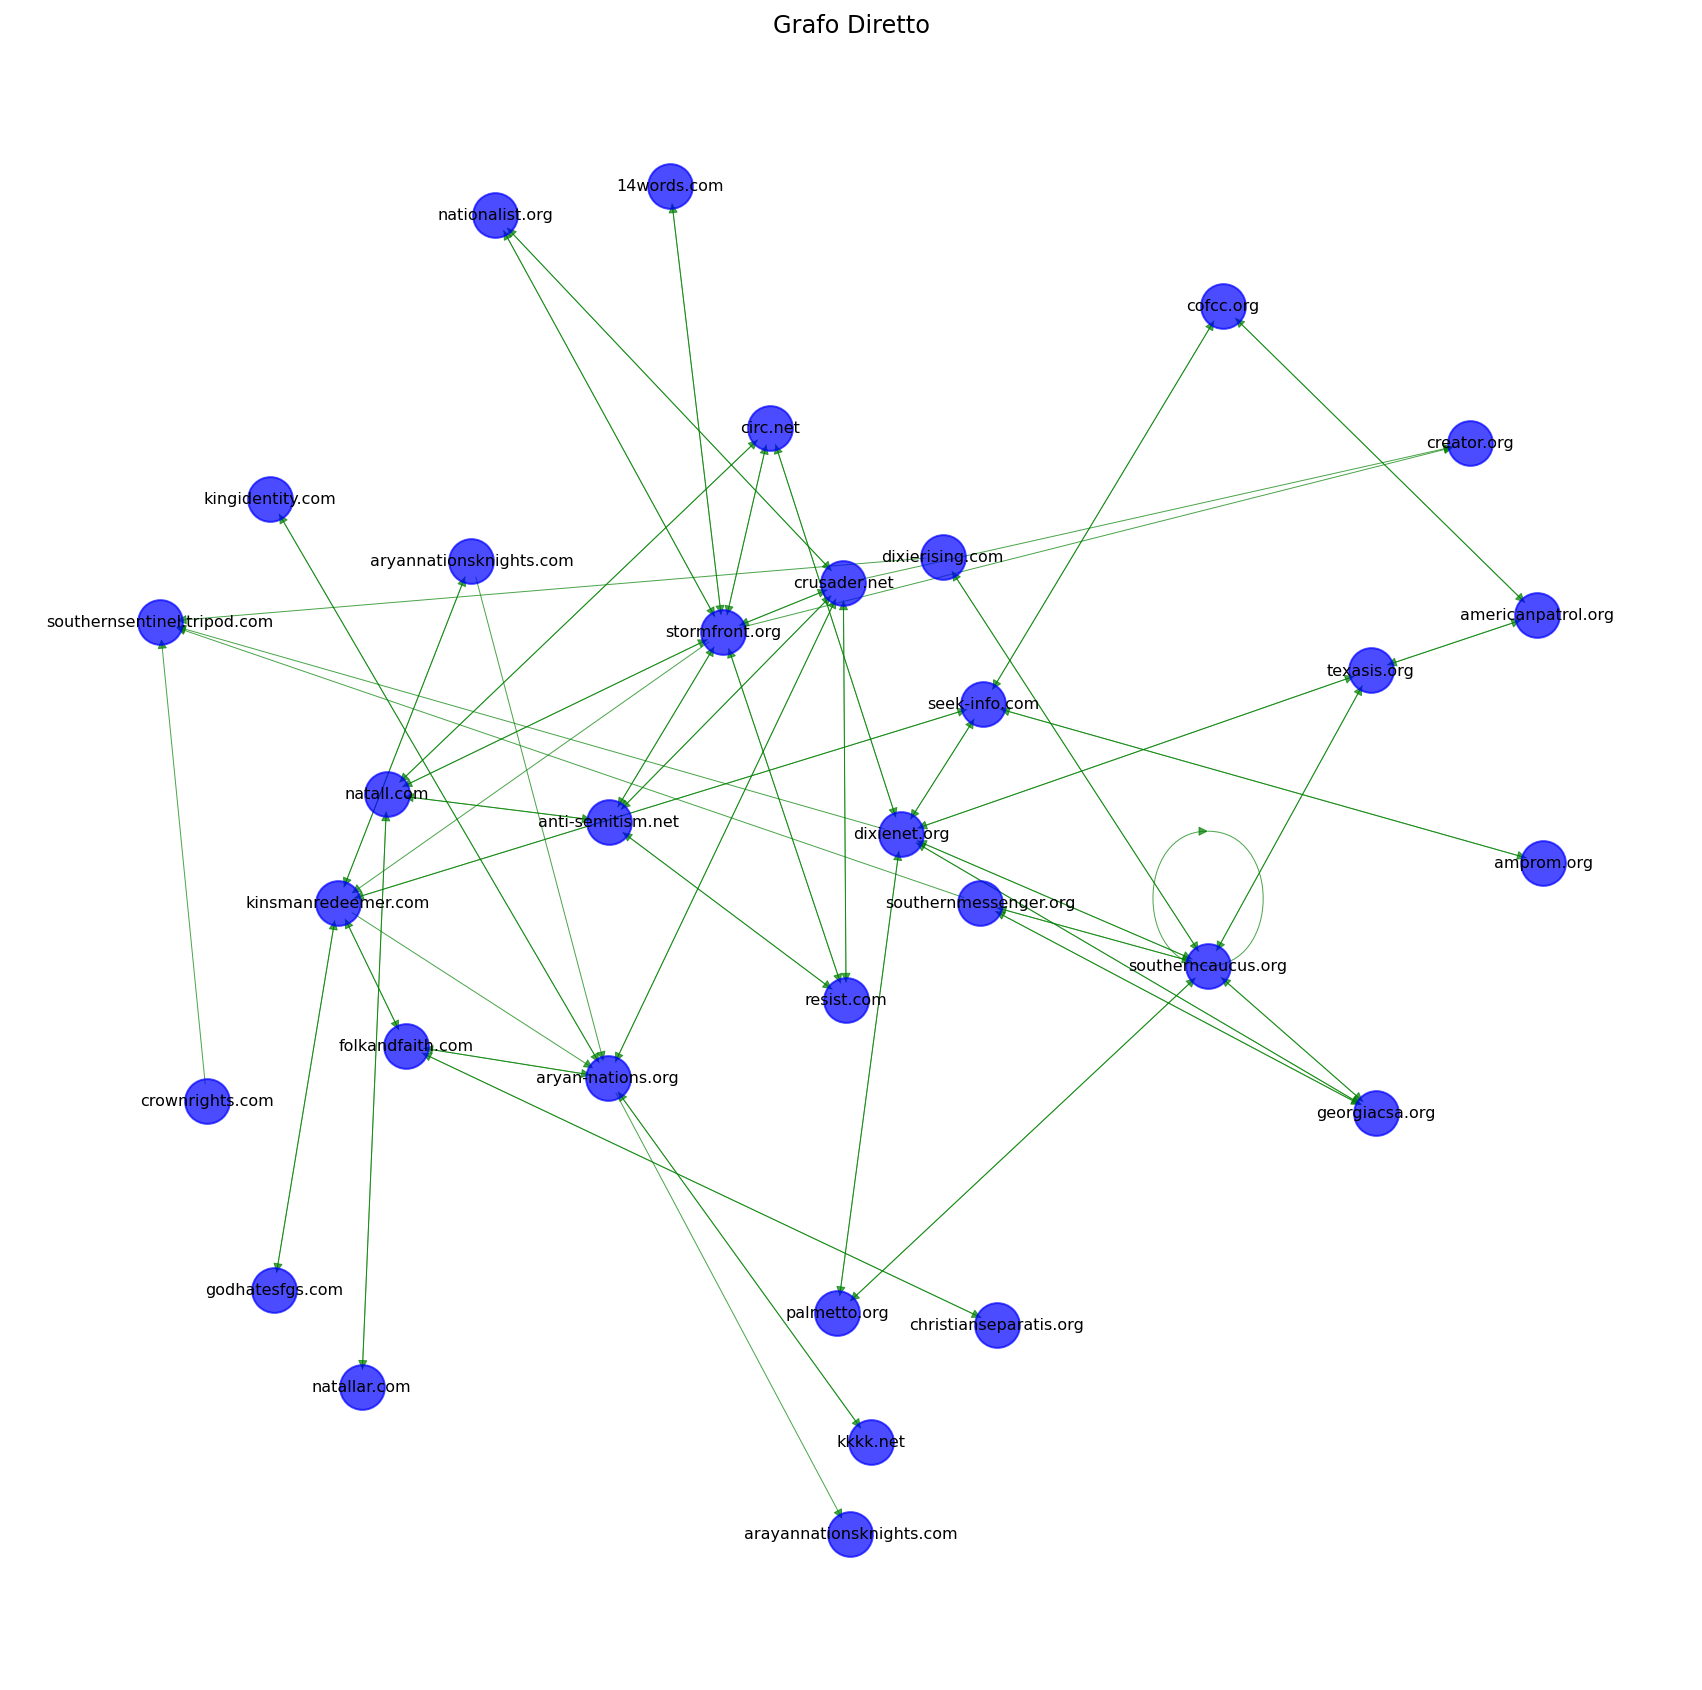

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.spring_layout(G_directed, k=1.8, iterations=100, seed=38)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = 500

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()

#### Visualizzazione tramite algoritmo Kamada\-Kawai



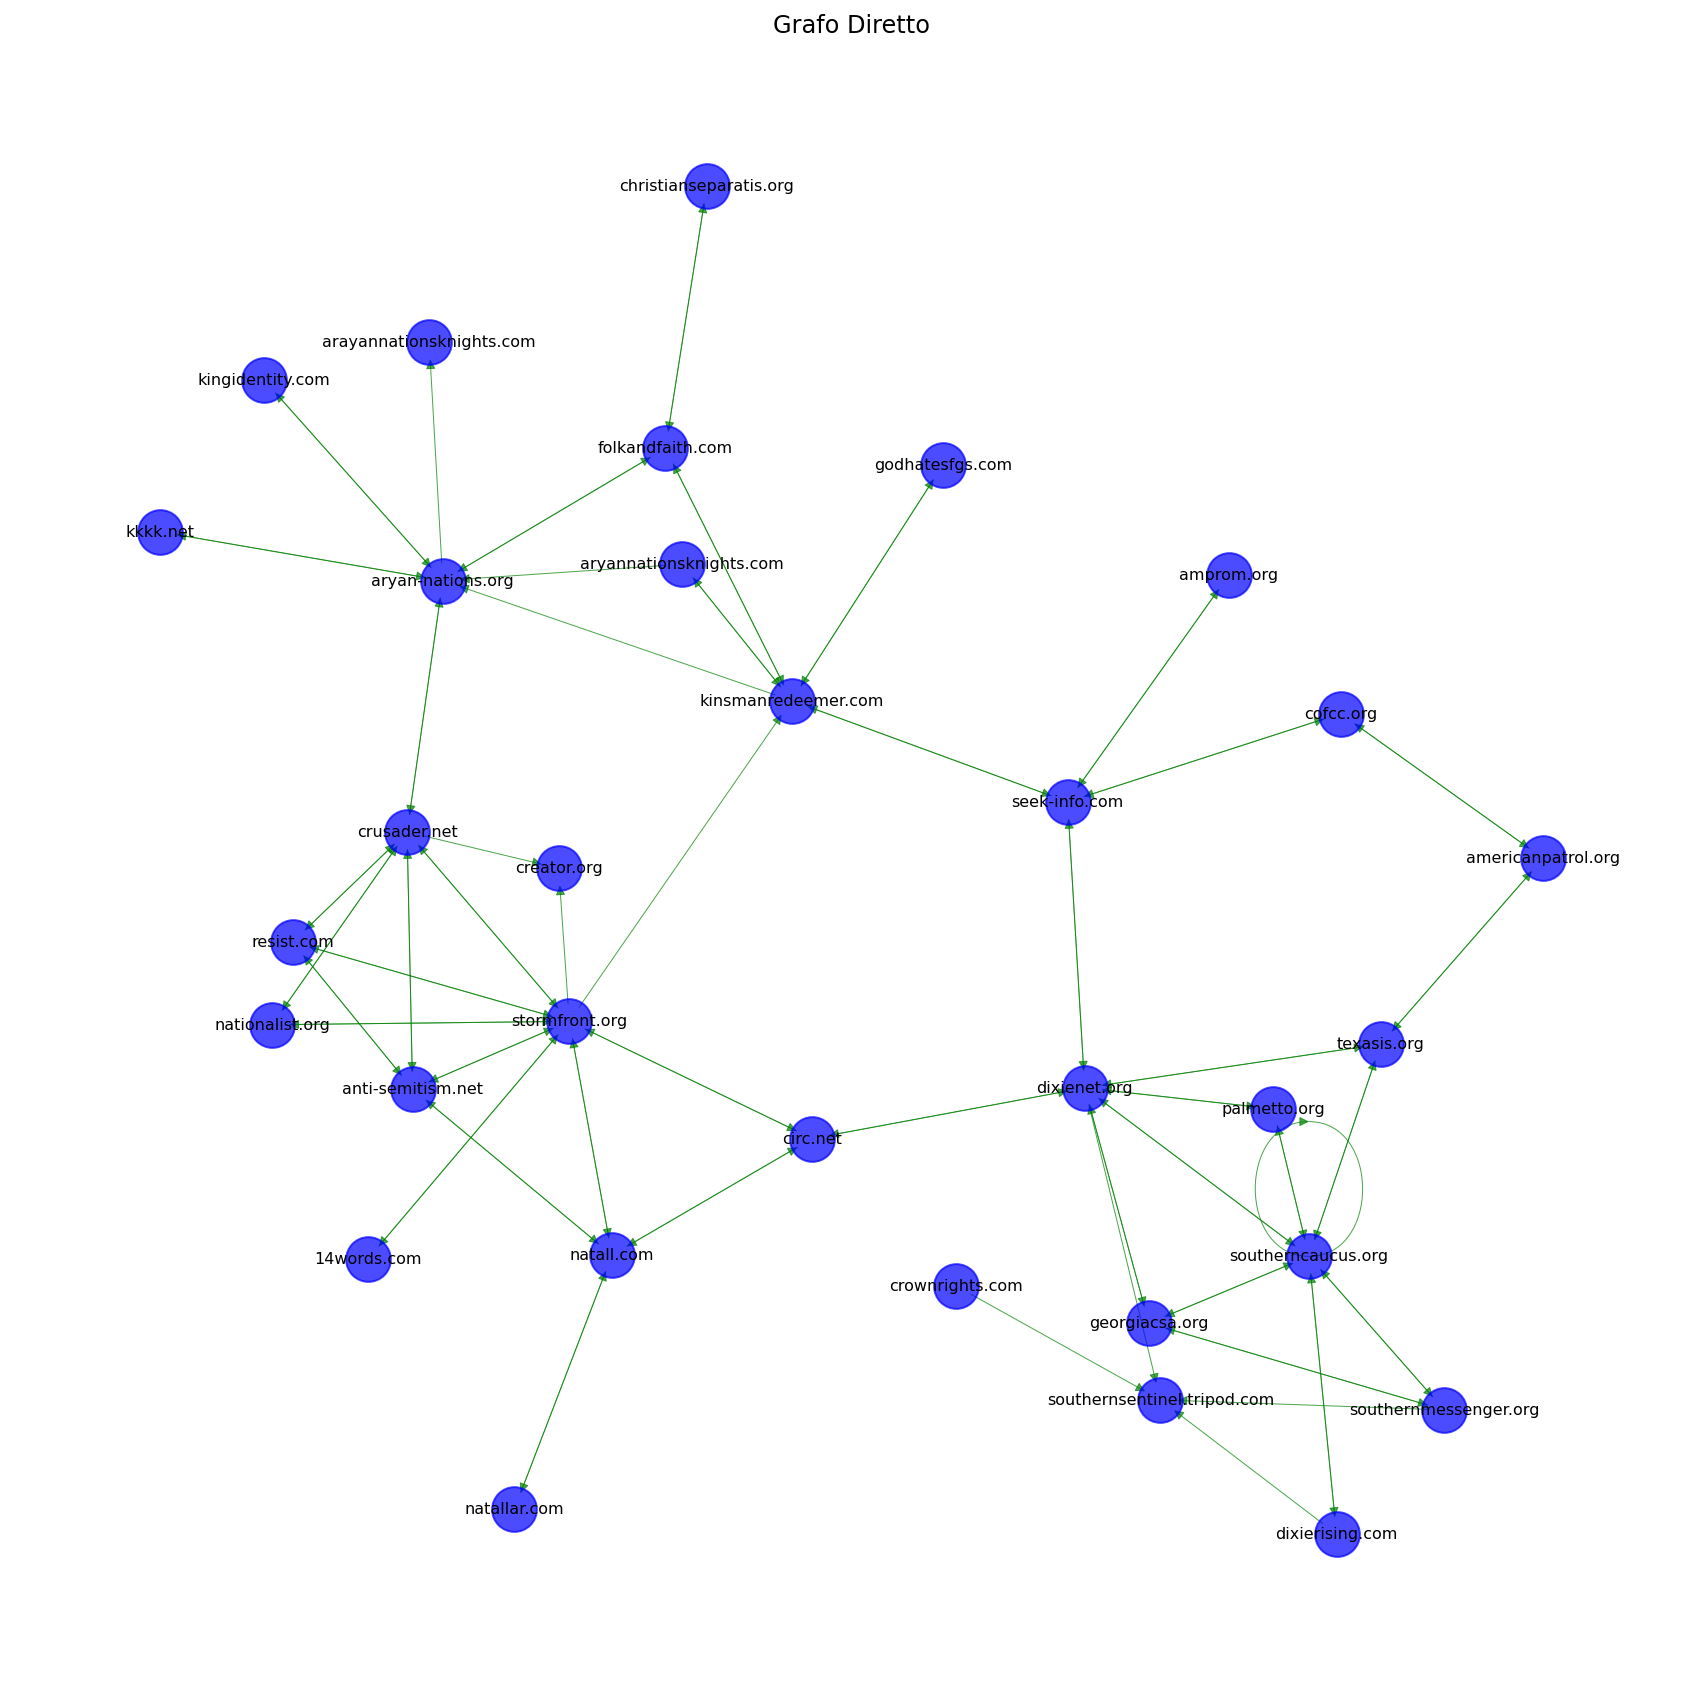

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = 500

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()

#### Visualizzazione tramite algoritmo Kamada\-Kawai in base al numero di archi entranti \(nodi più grandi hanno un numero maggiore di archi entranti, misuro così la popolarità\)



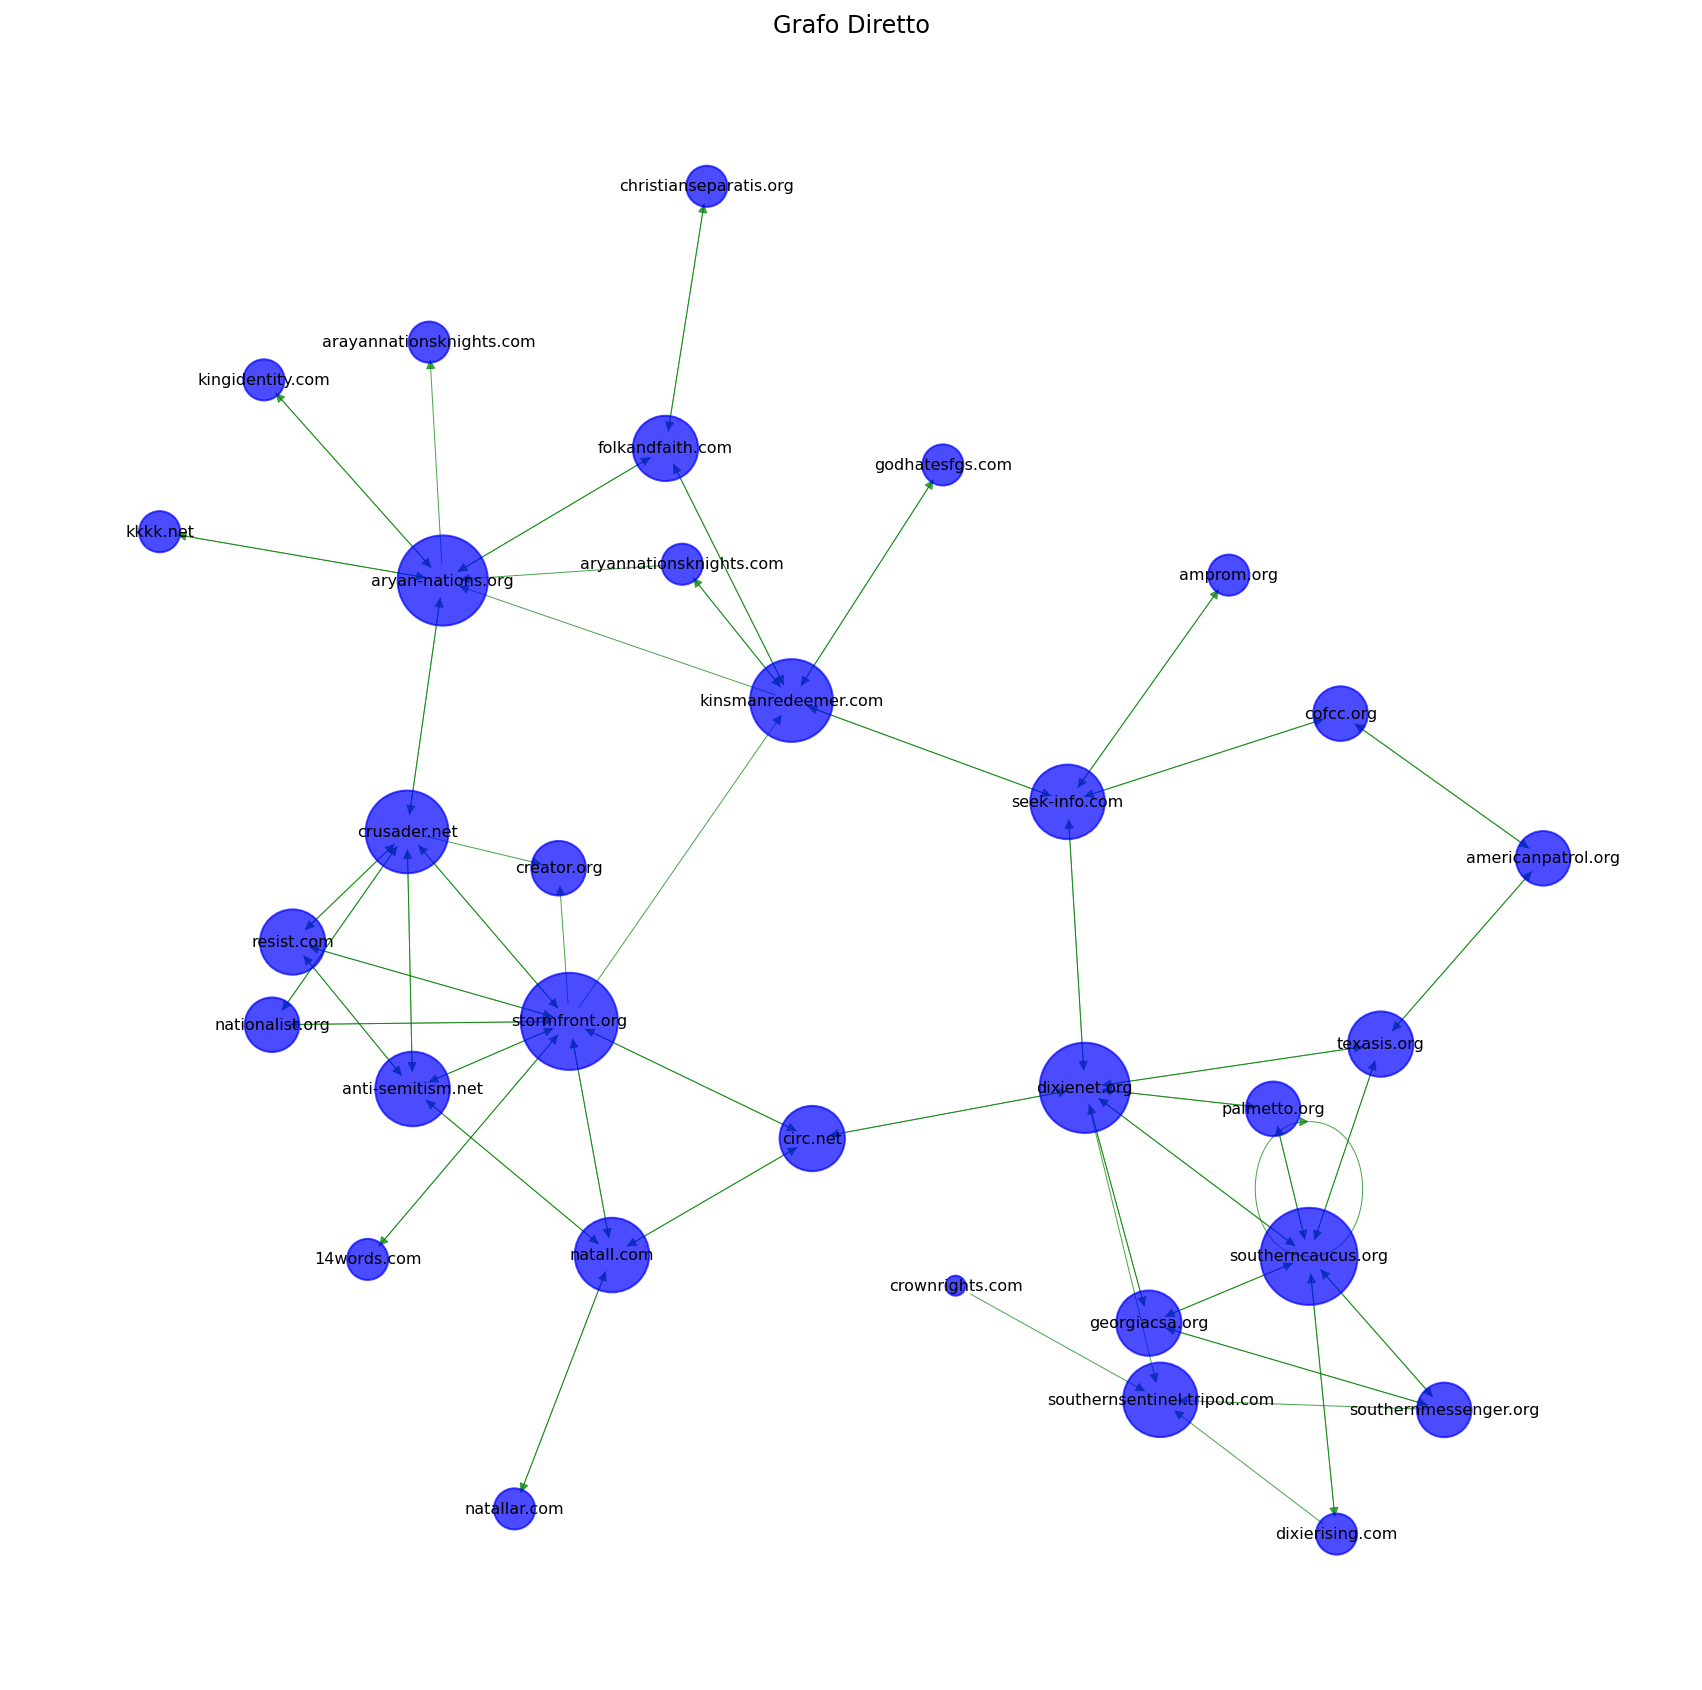

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = [v * 10000 +100 for v in nx.in_degree_centrality(G_directed).values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()


#### Calcolo n archi più popolari \(con più nodi entranti\)



In [8]:
n = 10    # numero di nodi da stampare
in_degree_centrality = nx.in_degree_centrality(G_directed)
# Ordina i nodi per centralità di grado in entrata e seleziona i primi n
top_n_nodes = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior numero di archi entranti sono:")
for node, centrality in top_n_nodes:
    
    print(f"{i}. Sito: {node}, Centralità di Grado in Entrata: {centrality}")
    i+=1

Classifica 10 siti con il maggior numero di archi entranti sono:
1. Sito: southerncaucus.org, Centralità di Grado in Entrata: 0.22580645161290322
2. Sito: stormfront.org, Centralità di Grado in Entrata: 0.22580645161290322
3. Sito: aryan-nations.org, Centralità di Grado in Entrata: 0.1935483870967742
4. Sito: dixienet.org, Centralità di Grado in Entrata: 0.1935483870967742
5. Sito: crusader.net, Centralità di Grado in Entrata: 0.16129032258064516
6. Sito: kinsmanredeemer.com, Centralità di Grado in Entrata: 0.16129032258064516
7. Sito: anti-semitism.net, Centralità di Grado in Entrata: 0.12903225806451613
8. Sito: natall.com, Centralità di Grado in Entrata: 0.12903225806451613
9. Sito: seek-info.com, Centralità di Grado in Entrata: 0.12903225806451613
10. Sito: southernsentinel.tripod.com, Centralità di Grado in Entrata: 0.12903225806451613


#### Visualizzazione tramite algoritmo Kamada\-Kawai in base alla Eigenvector Centrality \(nodi più grandi hanno un numero maggiore di connessioni con nodi "importanti"\)



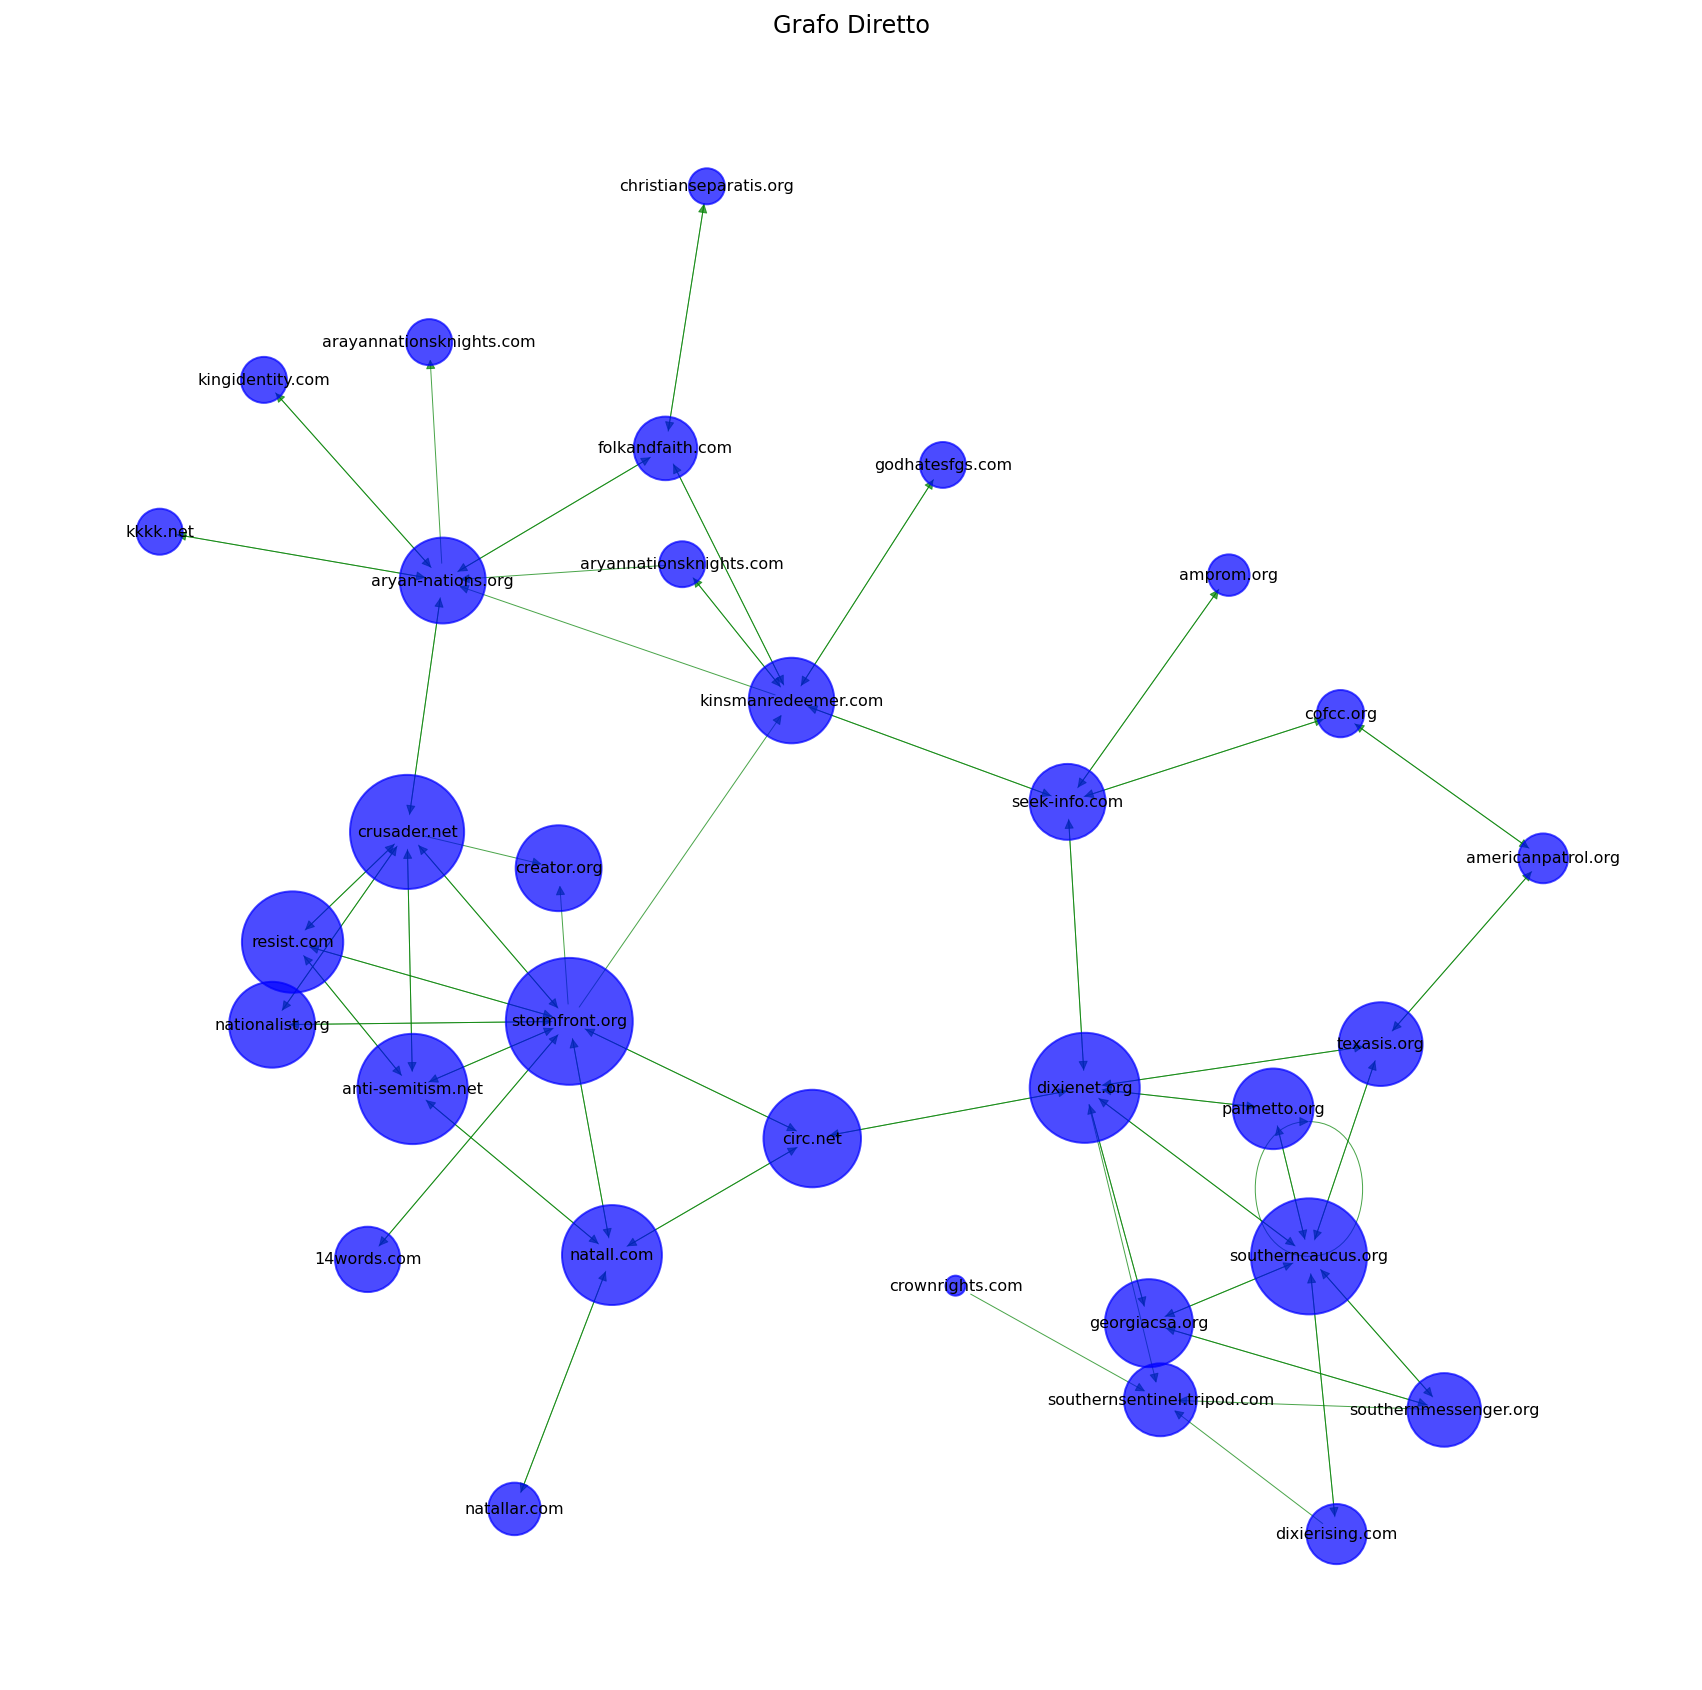

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = [v * 10000 +100 for v in nx.eigenvector_centrality(G_directed, max_iter=500).values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()


#### Calcolo n archi con valori di Eigenvector Centrality maggiori



In [10]:
# ATTENZIONE! NON FA DIFFERENZA TRA NODI ENTRANTI E USCENTI! VUOL DIRE CHE NODI CHE NON SONO PUNTATI DA NODI IMPORTANTI MA CHE PUNTANO (E BASTA) A NODI IMPORTANTI SONO CONSIDERATI IMPORTANTI A LORO VOLTA

n = 10    # numero di nodi da stampare
eigenvector_centrality = nx.eigenvector_centrality(G_directed, max_iter = 500)
# Ordina i nodi per centralità di grado in entrata e seleziona i primi n
top_n_eigenvector_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Eigenvector Centrality:")
for node, centrality in top_n_eigenvector_nodes:
    
    print(f"{i}. Sito: {node}, Centralità di Grado in Entrata: {centrality}")
    i+=1

Classifica 10 siti con il maggior valore di Eigenvector Centrality:
1. Sito: stormfront.org, Centralità di Grado in Entrata: 0.3926026919699552
2. Sito: southerncaucus.org, Centralità di Grado in Entrata: 0.32652597981863796
3. Sito: crusader.net, Centralità di Grado in Entrata: 0.31562254291888964
4. Sito: anti-semitism.net, Centralità di Grado in Entrata: 0.29408179420754904
5. Sito: dixienet.org, Centralità di Grado in Entrata: 0.2928185159954462
6. Sito: resist.com, Centralità di Grado in Entrata: 0.24674418061525308
7. Sito: natall.com, Centralità di Grado in Entrata: 0.23962890949946963
8. Sito: circ.net, Centralità di Grado in Entrata: 0.22772677859410775
9. Sito: georgiacsa.org, Centralità di Grado in Entrata: 0.1833735657546251
10. Sito: creator.org, Centralità di Grado in Entrata: 0.17434824378312247


#### Visualizzazione tramite algoritmo Kamada\-Kawai in base alla Katz Centrality \(nodi piu grandi sono piu \-&gt; non lo so\)



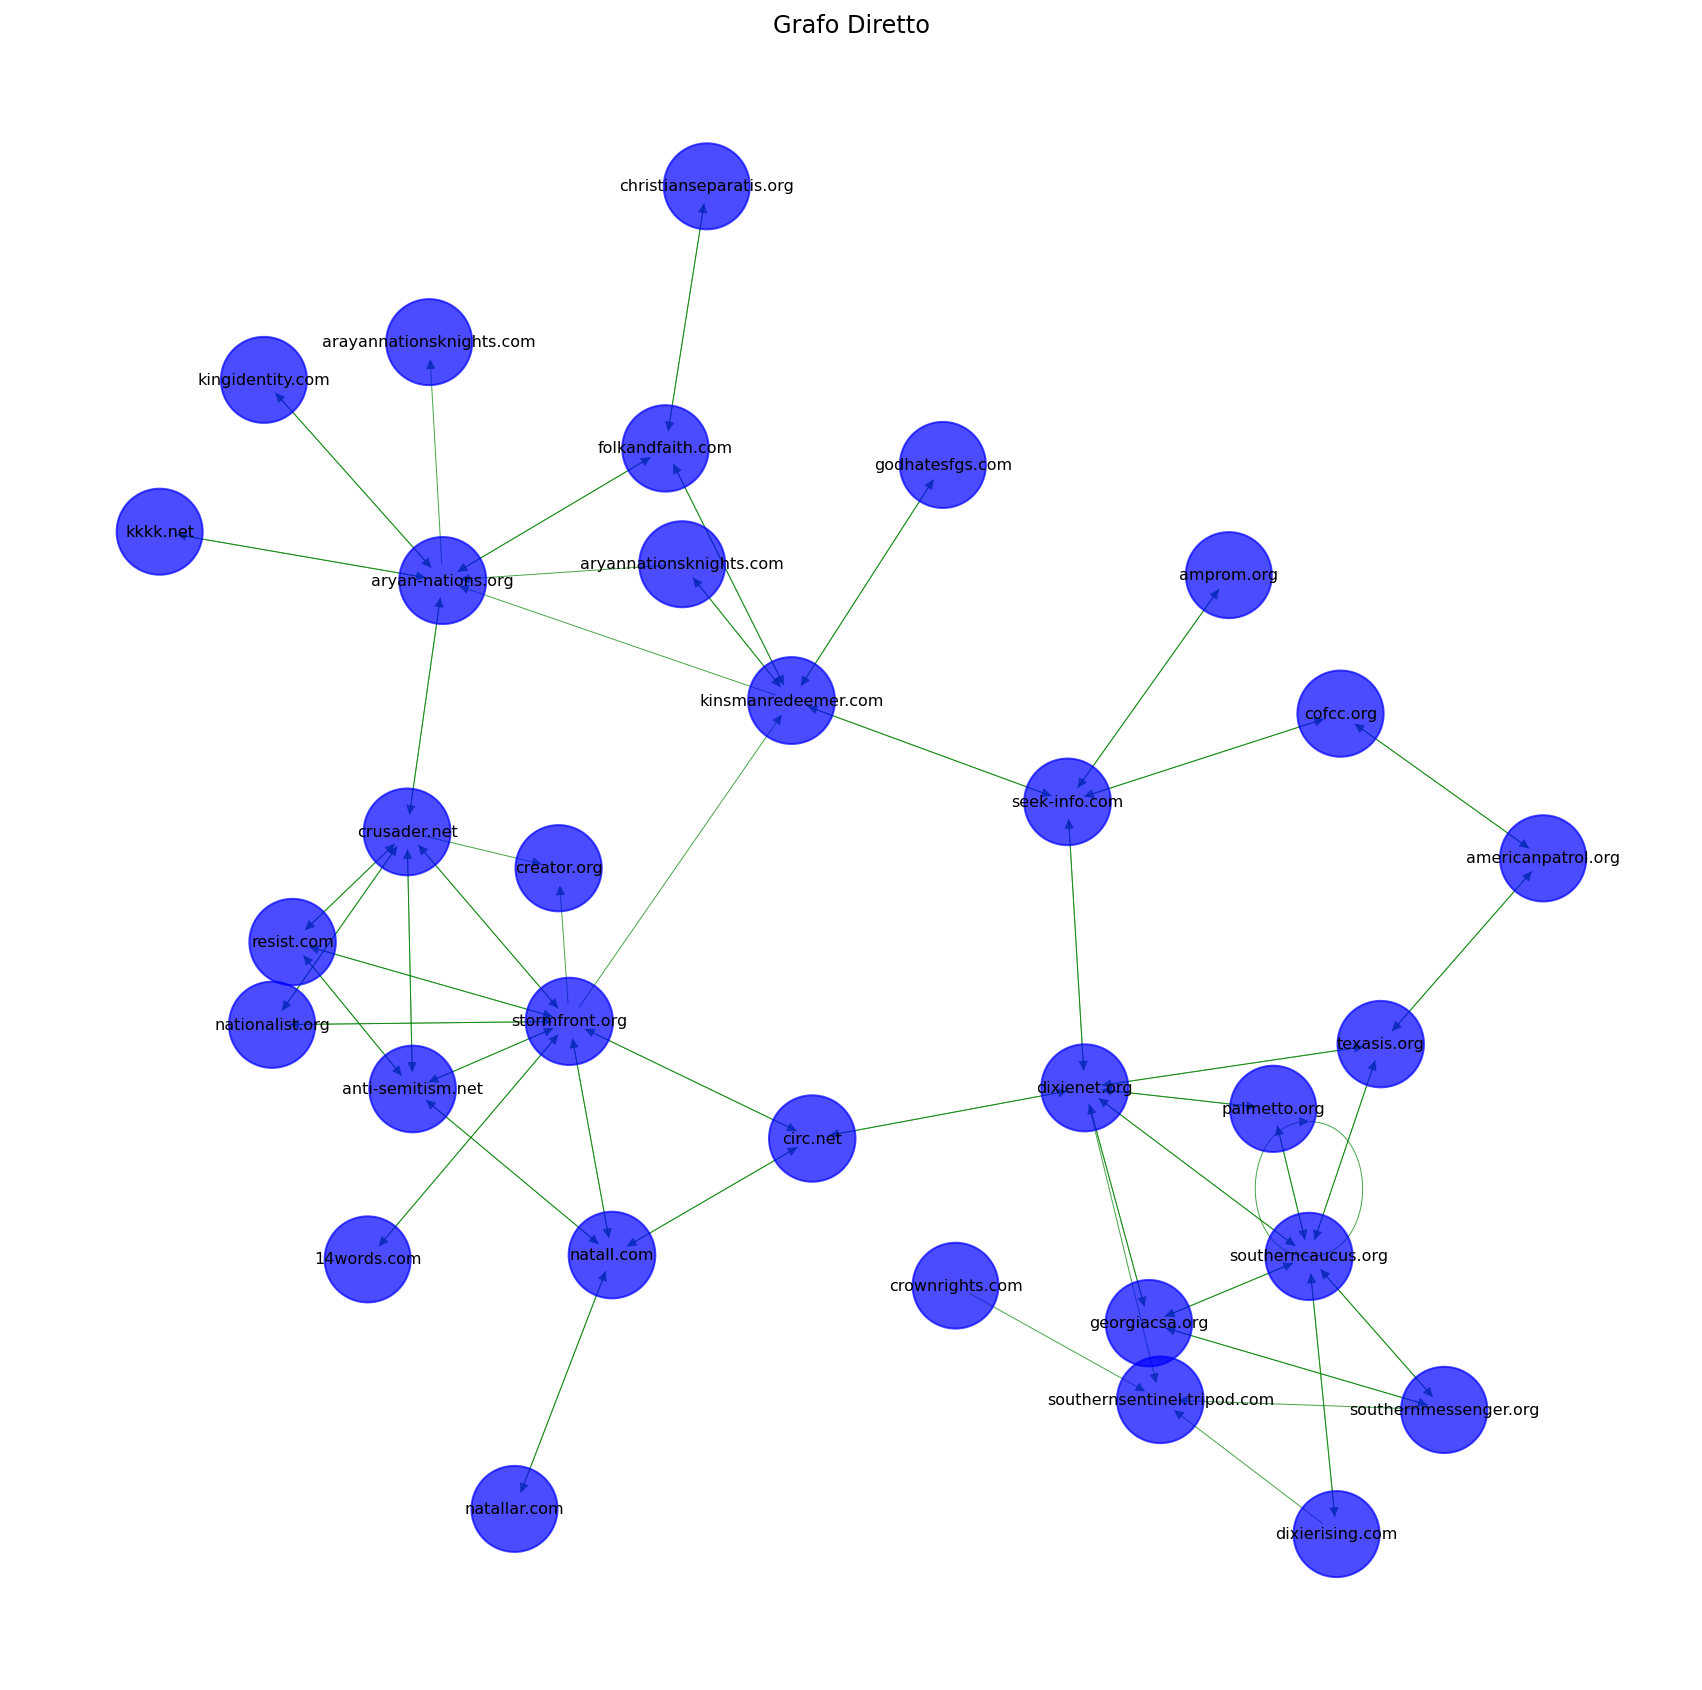

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di grado
node_size = [v * 10000 +100 for v in nx.katz_centrality(G_directed,alpha=0.005, max_iter=500).values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')  # Nascondiamo gli assi per una visualizzazione più pulita
plt.title('Grafo Diretto')
plt.show()


#### Calcolo n archi con valori di Katz Centrality maggiori



In [12]:
# ATTENZIONE! VALORI MOLTO SIMILI, FORSE DA REGOLARE ALPHA (O FORSE VALORI TIPICI DELLA RETE CONSIDERATA)

n = 10    # numero di nodi da stampare
katz_centrality = nx.katz_centrality(G_directed, alpha=0.005, max_iter=500)
# Ordina i nodi per centralità di grado in entrata e seleziona i primi n
top_n_katz_nodes = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Katz Centrality:")
for node, centrality in top_n_katz_nodes:
    
    print(f"{i}. Sito: {node}, Centralità di Grado in Entrata: {centrality}")
    i+=1

Classifica 10 siti con il maggior valore di Katz Centrality:
1. Sito: southerncaucus.org, Centralità di Grado in Entrata: 0.18050148789317044
2. Sito: stormfront.org, Centralità di Grado in Entrata: 0.1804928156645363
3. Sito: dixienet.org, Centralità di Grado in Entrata: 0.1796211217176918
4. Sito: aryan-nations.org, Centralità di Grado in Entrata: 0.17959428693811977
5. Sito: crusader.net, Centralità di Grado in Entrata: 0.1787493662231877
6. Sito: kinsmanredeemer.com, Centralità di Grado in Entrata: 0.17872261924434774
7. Sito: anti-semitism.net, Centralità di Grado in Entrata: 0.17786460075172375
8. Sito: natall.com, Centralità di Grado in Entrata: 0.17784688145286867
9. Sito: seek-info.com, Centralità di Grado in Entrata: 0.177842211673983
10. Sito: southernsentinel.tripod.com, Centralità di Grado in Entrata: 0.1778202257606459


#### Visualizzazione tramite algoritmo Kamada\-Kawai in base all'Hyperlink\-induced topic search \(HITS\) per autorità \(nodi piu grandi sono più autorevoli \(vengono puntati da tanti nodi\)\)



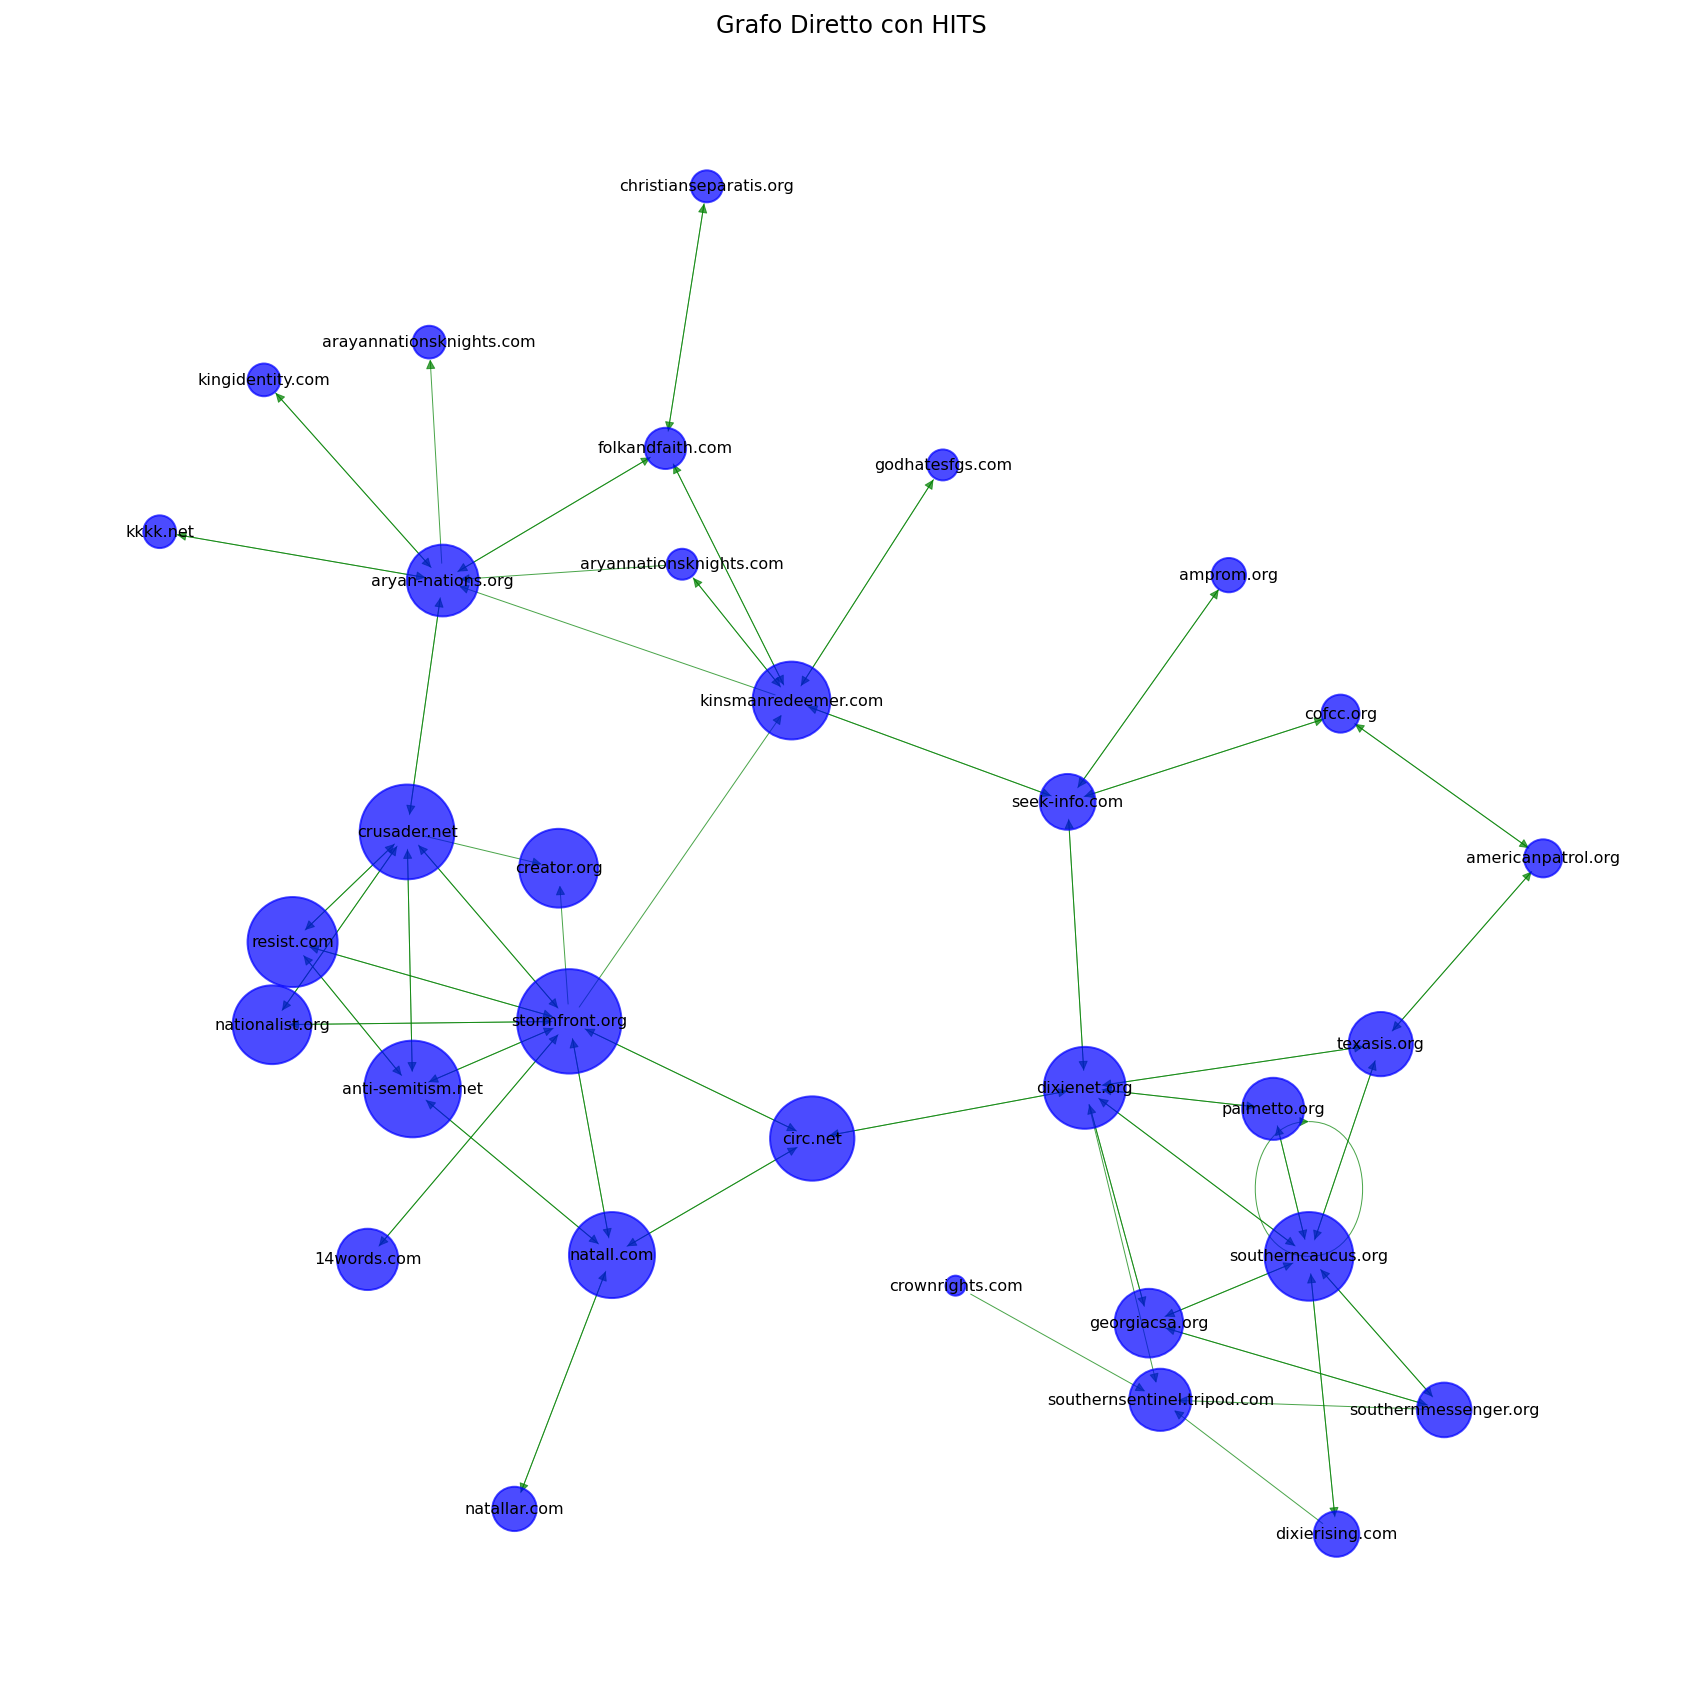

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Calcola i punteggi HITS (ritorna due dizionari per autorità e hub)
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Scegli se utilizzare i punteggi di autorità o hub per la dimensione dei nodi
# In questo esempio, usiamo i punteggi di autorità
node_size = [authorities[n] * 30000 + 100 for n in G_directed.nodes()]

# Visualizza il grafo con i punteggi HITS
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto con HITS')
plt.show()


#### Calcolo n archi con valori di HITS Centrality maggiori \(autorità\)



In [14]:
import networkx as nx

# Supponendo che G_directed sia il tuo grafo diretto già definito

# Calcola i punteggi HITS (hubs e authorities)
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Numero di nodi da stampare
n = 10

# Ordina i nodi per punteggio di autorità e seleziona i primi n
top_n_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:n]

# Stampa i primi n siti con il maggior valore di autorità
print(f"Classifica {n} siti con il maggior valore di autorità:")
for i, (node, authority_score) in enumerate(top_n_authorities, start=1):
    print(f"{i}. Sito: {node}, Autorità: {authority_score}")


Classifica 10 siti con il maggior valore di autorità:
1. Sito: stormfront.org, Autorità: 0.08752665726932667
2. Sito: anti-semitism.net, Autorità: 0.07456500196413099
3. Sito: crusader.net, Autorità: 0.07152199237395991
4. Sito: resist.com, Autorità: 0.06425419814372055
5. Sito: southerncaucus.org, Autorità: 0.06218839027029609
6. Sito: natall.com, Autorità: 0.0582823297281095
7. Sito: circ.net, Autorità: 0.05592480886858296
8. Sito: dixienet.org, Autorità: 0.052609011840024866
9. Sito: creator.org, Autorità: 0.04839379707177436
10. Sito: nationalist.org, Autorità: 0.04839379707177433


#### Visualizzazione tramite algoritmo Kamada\-Kawai in base all'Hyperlink\-induced topic search \(HITS\) per hub \(nodi piu grandi linkano a più nodi autorevoli \(indicatori di dove trovare informazioni di qualità\)\)



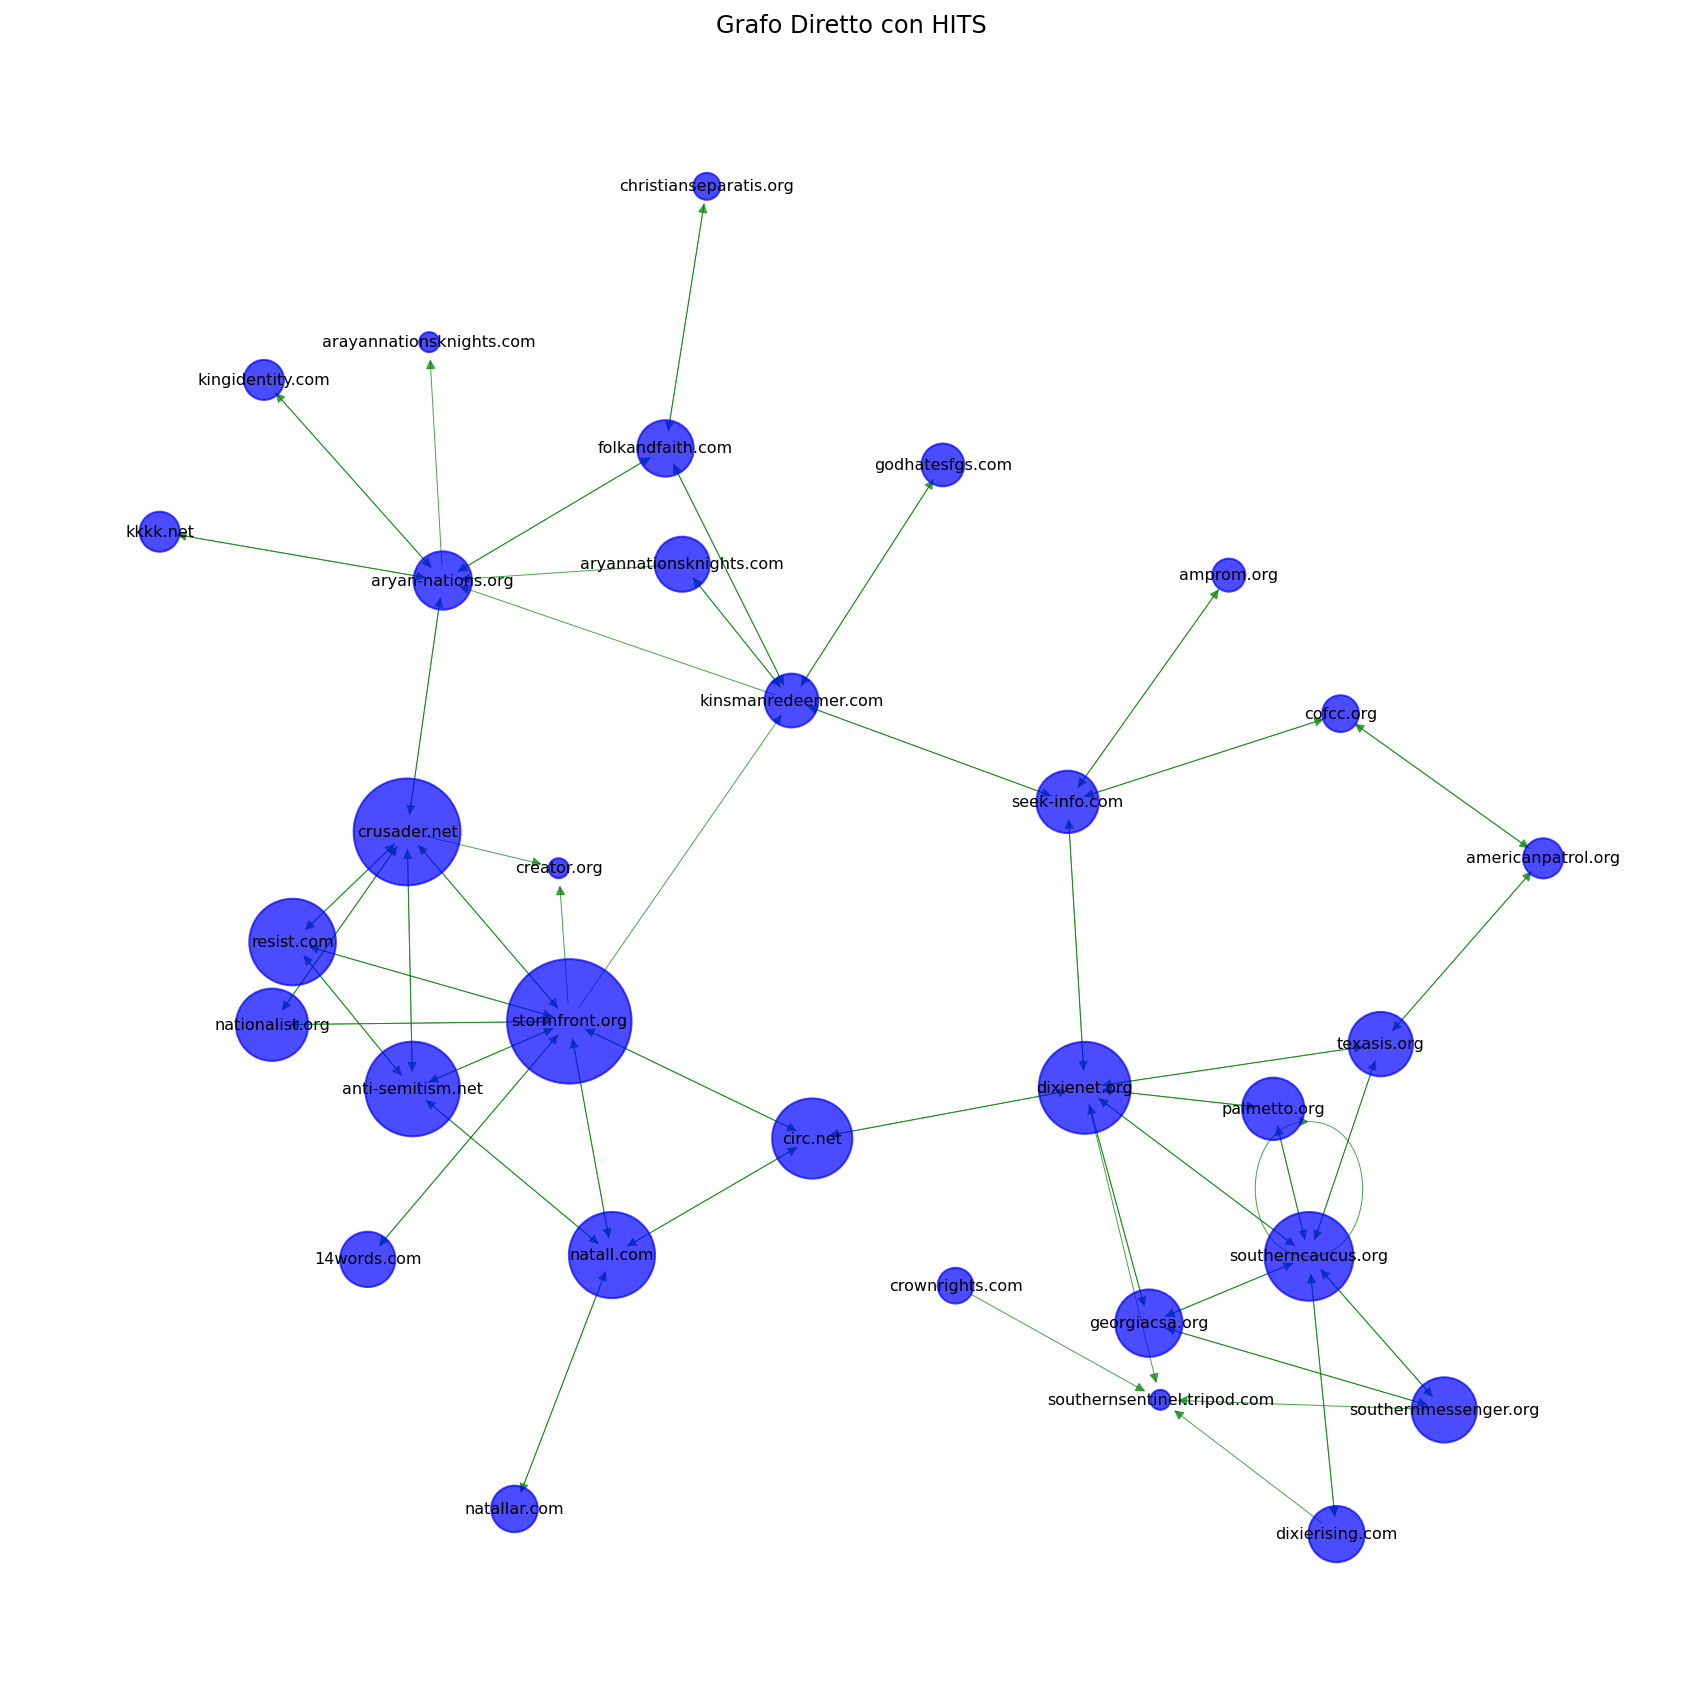

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Calcola i punteggi HITS (ritorna due dizionari per autorità e hub)
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Scegli se utilizzare i punteggi di autorità o hub per la dimensione dei nodi
# In questo esempio, usiamo i punteggi di hubs
node_size = [hubs[n] * 30000 + 100 for n in G_directed.nodes()]

# Visualizza il grafo con i punteggi HITS
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto con HITS')
plt.show()


#### Calcolo n archi con valori di HITS Centrality maggiori \(hub\)



In [16]:
import networkx as nx

# Supponendo che G_directed sia il tuo grafo diretto già definito

# Calcola i punteggi HITS (hubs e authorities)
hubs, authorities = nx.hits(G_directed, max_iter=500)

# Numero di nodi da stampare
n = 10

# Ordina i nodi per punteggio di hubs e seleziona i primi n
top_n_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:n]

# Stampa i primi n siti con il maggior valore di autorità
print(f"Classifica {n} siti con il maggior valore di autorità:")
for i, (node, hubs_score) in enumerate(top_n_hubs, start=1):
    print(f"{i}. Sito: {node}, Hub-score: {hubs_score}")


Classifica 10 siti con il maggior valore di autorità:
1. Sito: stormfront.org, Hub-score: 0.12576246595521348
2. Sito: crusader.net, Hub-score: 0.09188530947350221
3. Sito: anti-semitism.net, Hub-score: 0.07133106347486168
4. Sito: dixienet.org, Hub-score: 0.06723125496704846
5. Sito: southerncaucus.org, Hub-score: 0.06231519342874184
6. Sito: resist.com, Hub-score: 0.05917893249373305
7. Sito: natall.com, Hub-score: 0.05852426233229979
8. Sito: circ.net, Hub-score: 0.050263181444876126
9. Sito: nationalist.org, Hub-score: 0.04029015100657155
10. Sito: georgiacsa.org, Hub-score: 0.03453560055698804


#### Visualizzazione tramite Kamanda\-Kawai per closeness centrality \(nodi più grandi hanno valori di centrality maggiori\)



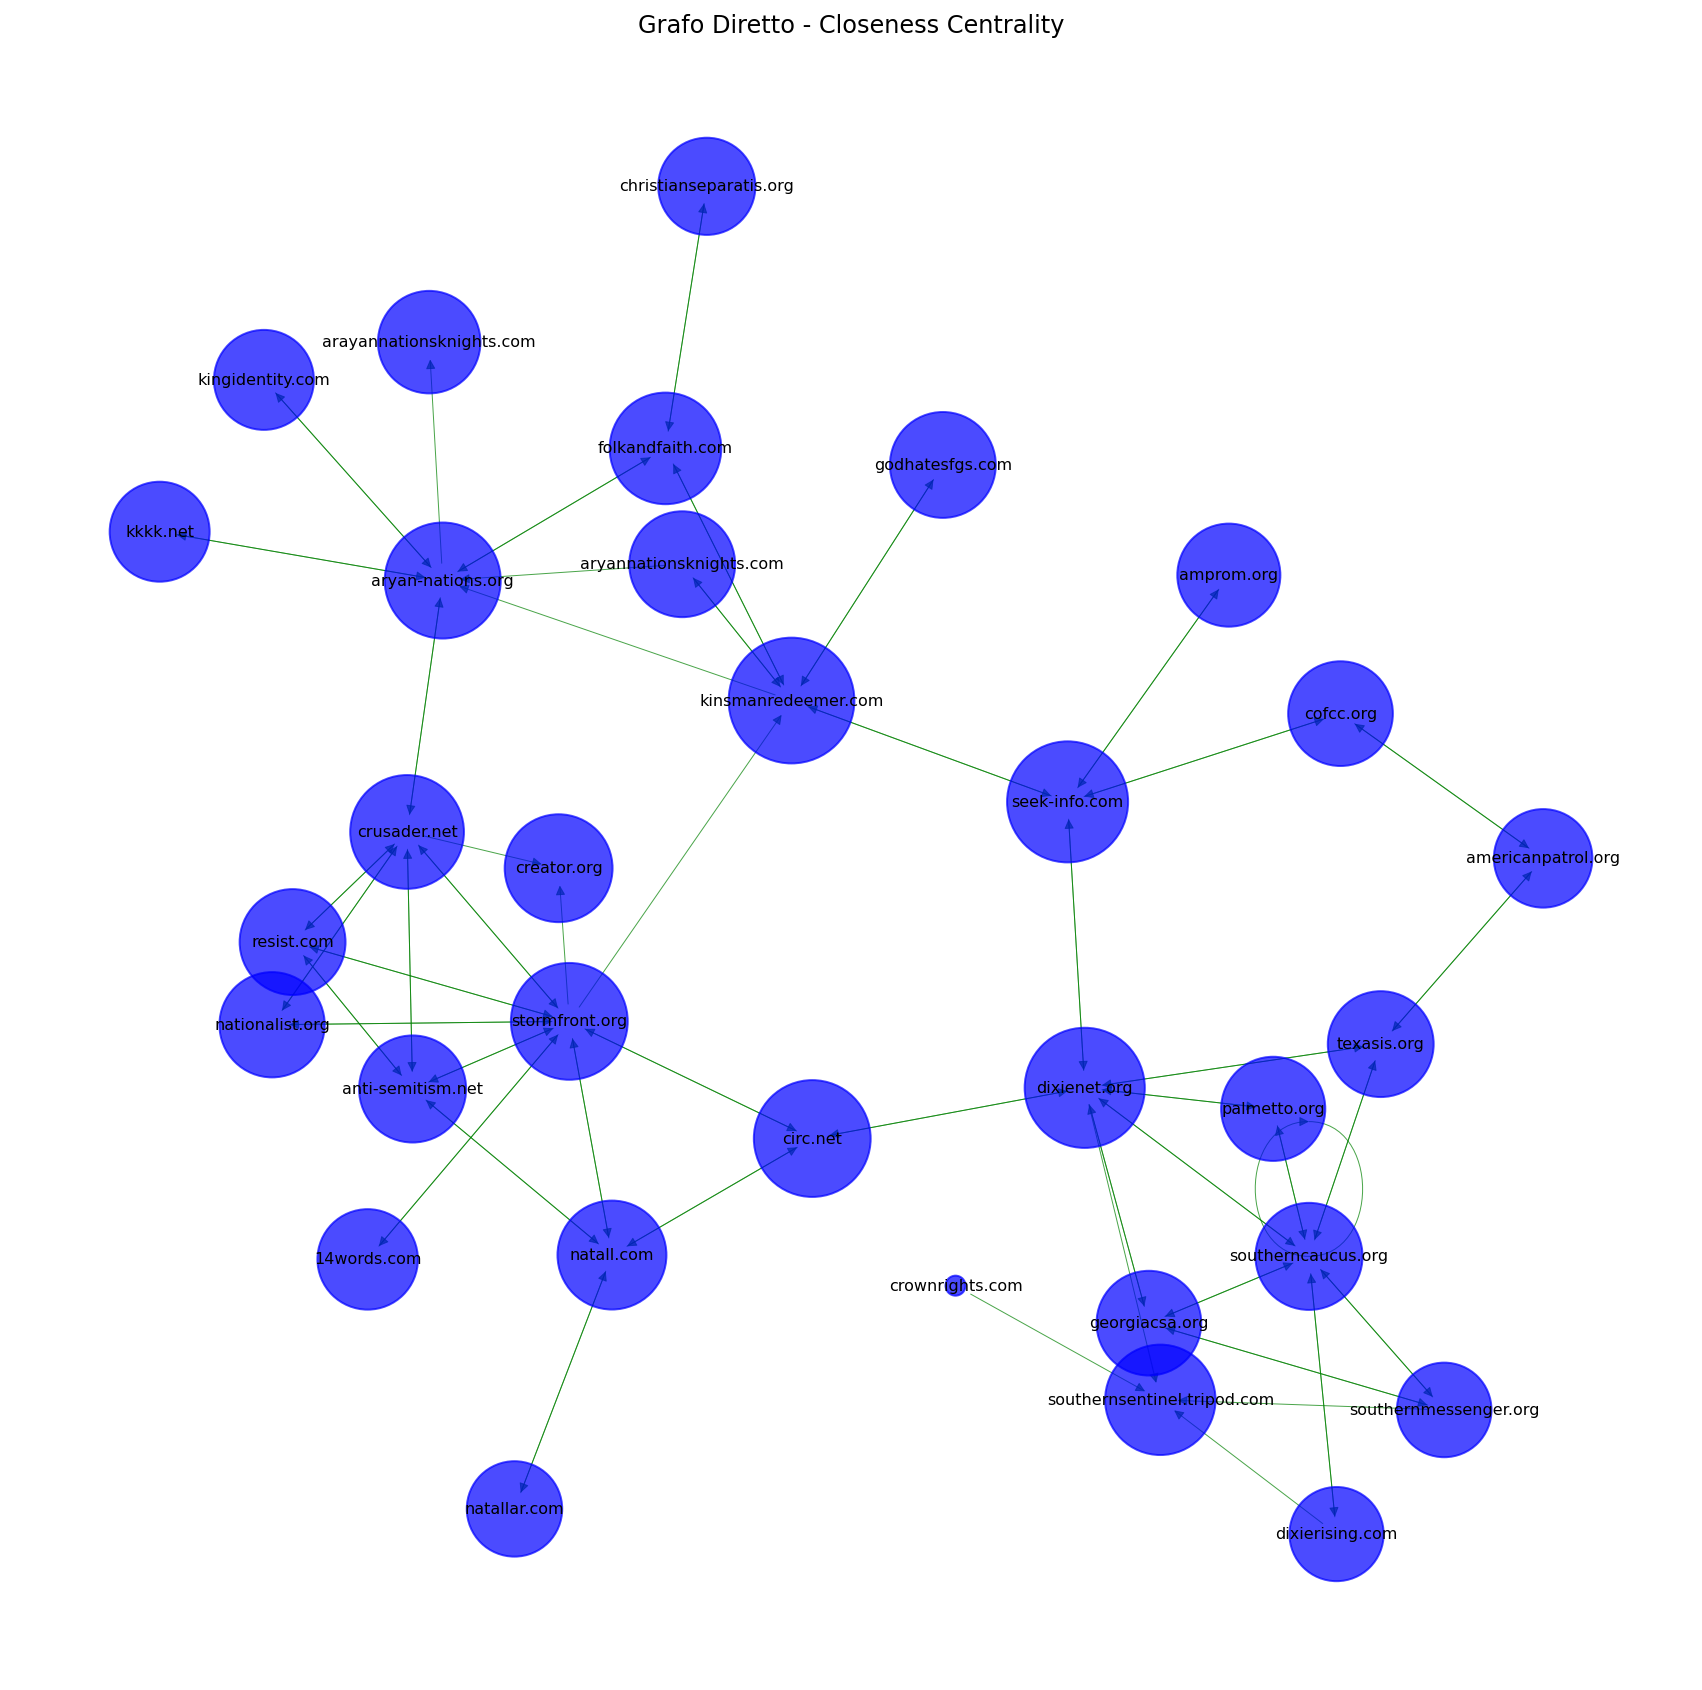

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola la centralità di closeness
closeness = nx.closeness_centrality(G_directed)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di closeness
node_size = [v * 10000 + 100 for v in closeness.values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto - Closeness Centrality')
plt.show()


### Classifica in base alla closeness centrality



In [6]:
n = 10    # numero di nodi da stampare
# Calcola la centralità di closeness
closeness_centrality = nx.closeness_centrality(G_directed)
# Ordina i nodi per closeness centrality e seleziona i primi n
top_n_closeness_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Closeness Centrality:")
for node, centrality in top_n_closeness_nodes:
    
    print(f"{i}. Sito: {node}, Closeness score: {centrality}")
    i+=1


Classifica 10 siti con il maggior valore di Closeness Centrality:
1. Sito: kinsmanredeemer.com, Closeness score: 0.3855103120042306
2. Sito: seek-info.com, Closeness score: 0.3563049853372434
3. Sito: dixienet.org, Closeness score: 0.35098700048146364
4. Sito: circ.net, Closeness score: 0.3312130849613812
5. Sito: stormfront.org, Closeness score: 0.3312130849613812
6. Sito: aryan-nations.org, Closeness score: 0.32661290322580644
7. Sito: crusader.net, Closeness score: 0.3135483870967742
8. Sito: folkandfaith.com, Closeness score: 0.3014888337468983
9. Sito: southernsentinel.tripod.com, Closeness score: 0.29488078541374474
10. Sito: natall.com, Closeness score: 0.2867820613690008


#### Visualizzazione tramite Kamanda\-Kawai per betweennes centrality \(nodi più grandi hanno valori di centrality maggiori\)



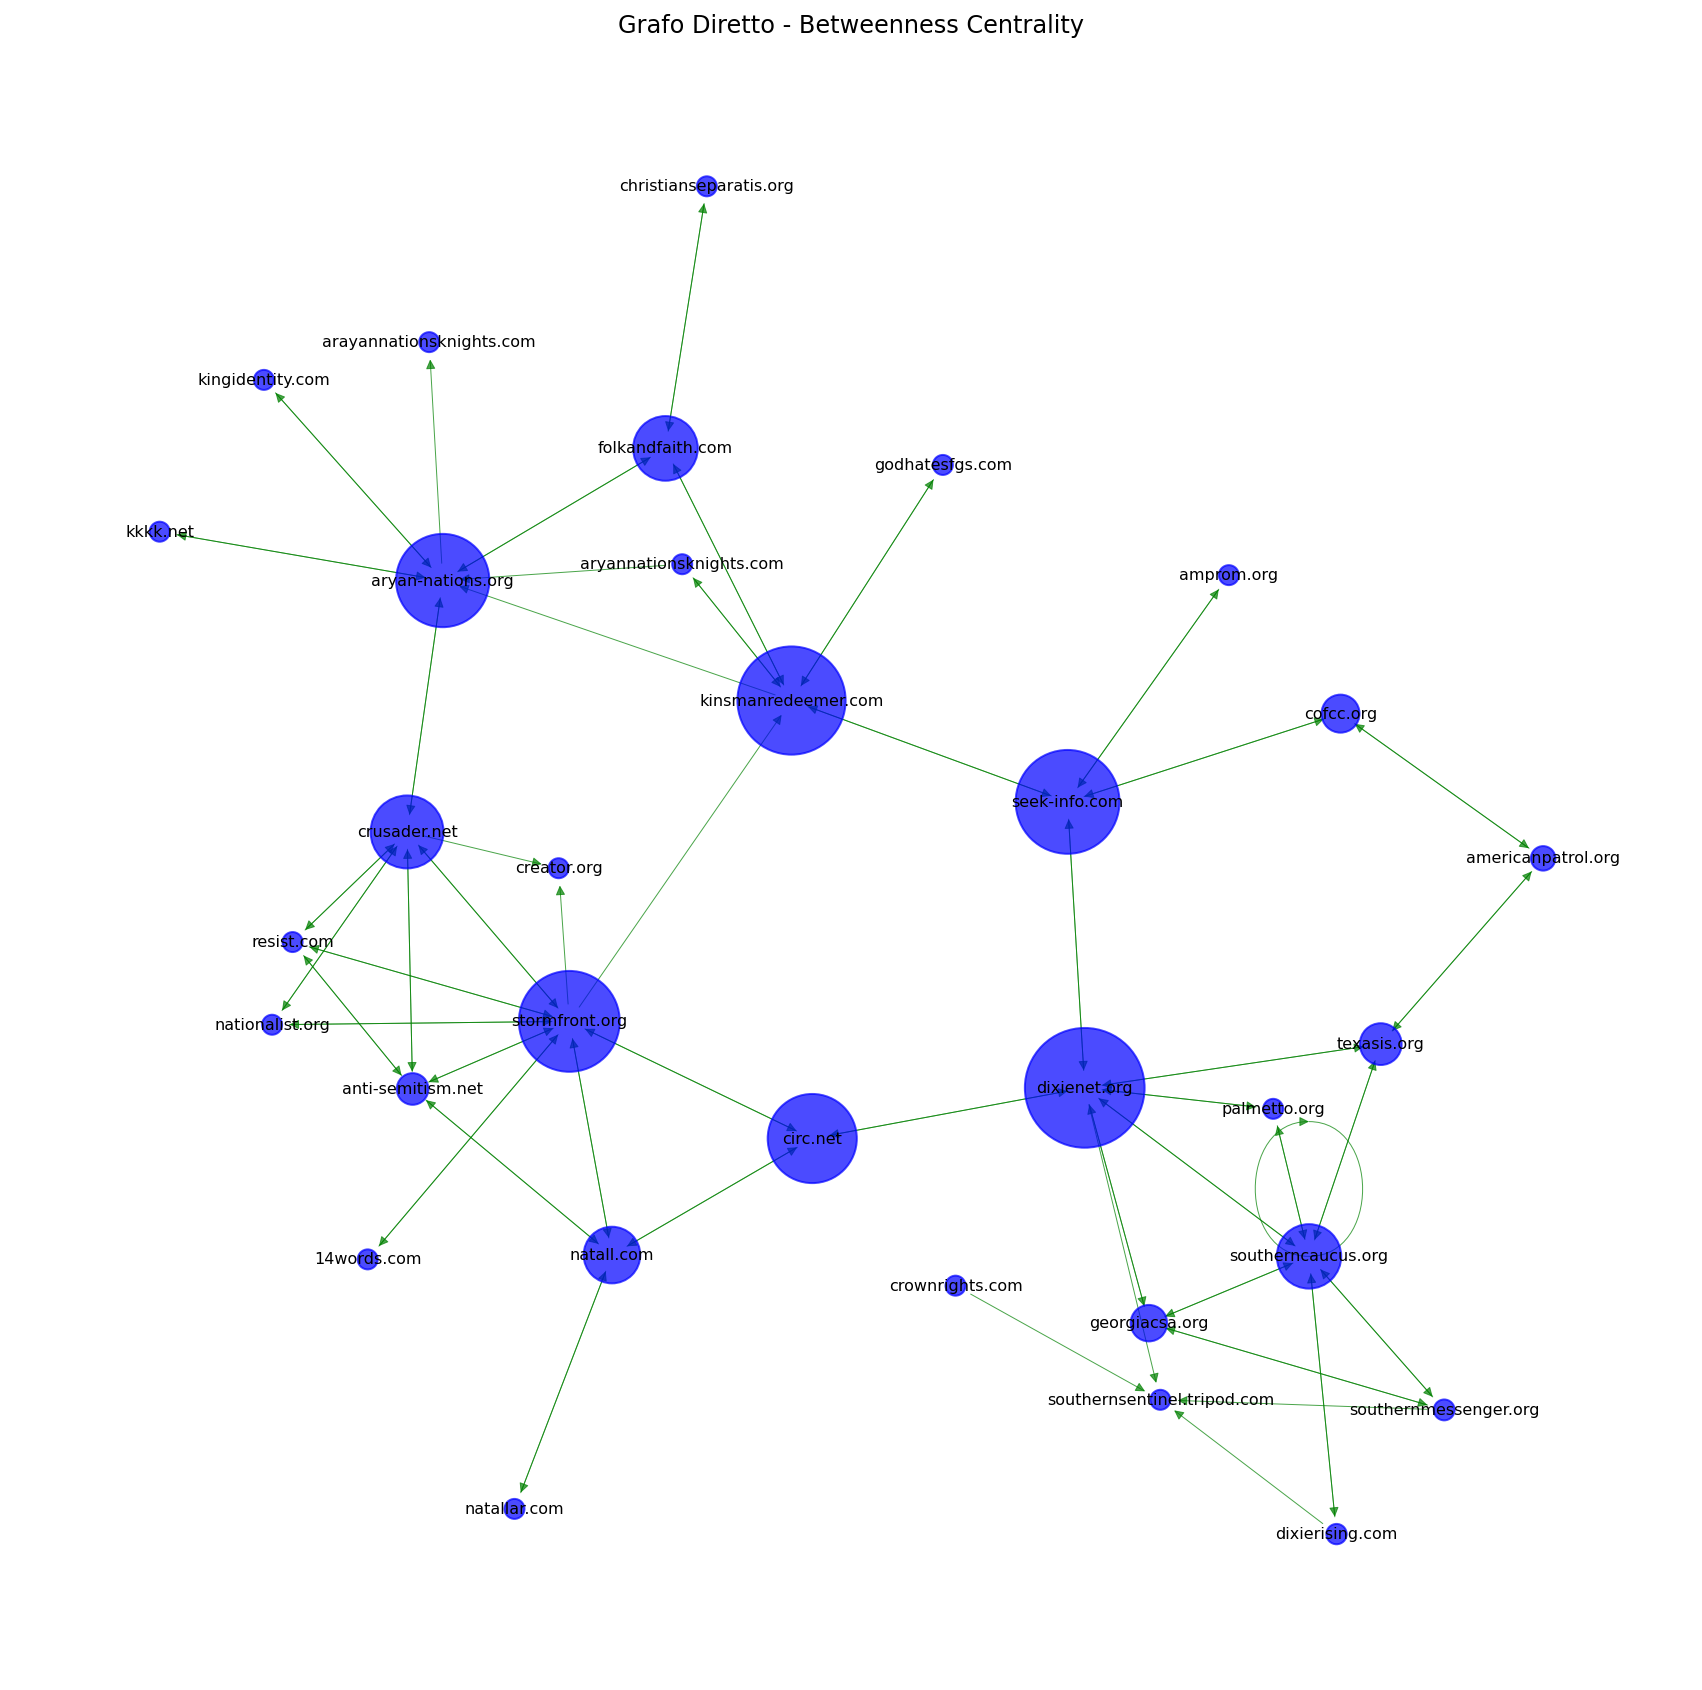

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola la centralità di betweenness
betweenness = nx.betweenness_centrality(G_directed)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base alla centralità di betweenness
node_size = [v * 10000 +100 for v in betweenness.values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto - Betweenness Centrality')
plt.show()


#### Calcolo della betweennes centrality \(Nodi con valori più grandi indicano che sono più presenti come nodi all'interno degli shortest paths tra nodi\)



In [18]:
n = 10    # numero di nodi da stampare
betweenness_centrality = nx.betweenness_centrality(G_directed)
# Ordina i nodi per centralità di grado in entrata e seleziona i primi n
top_n_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Betweenness Centrality:")
for node, centrality in top_n_betweenness_nodes:
    
    print(f"{i}. Sito: {node}, Betweenness score: {centrality}")
    i+=1

Classifica 10 siti con il maggior valore di Betweenness Centrality:
1. Sito: dixienet.org, Betweenness score: 0.3485663082437276
2. Sito: kinsmanredeemer.com, Betweenness score: 0.28279569892473116
3. Sito: seek-info.com, Betweenness score: 0.2596774193548387
4. Sito: stormfront.org, Betweenness score: 0.24444444444444446
5. Sito: aryan-nations.org, Betweenness score: 0.20770609318996414
6. Sito: circ.net, Betweenness score: 0.18870967741935485
7. Sito: crusader.net, Betweenness score: 0.12311827956989248
8. Sito: folkandfaith.com, Betweenness score: 0.09462365591397849
9. Sito: southerncaucus.org, Betweenness score: 0.09390681003584227
10. Sito: natall.com, Betweenness score: 0.07025089605734768


# Calcolo misure per gruppi di nodi



#### Clique \(ATTENZIONE, MISURA CHE SI USA SU GRAFI NON DIRETTI. STA TRASFORMANDO IL GRAFO DIRETTO IN NON DIRETTO\)



In [15]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Trasformiamo il grafo diretto in un grafo non diretto per analizzare le clique
G_undirected = G_directed.to_undirected()

# Trova tutte le clique massimali nel grafo non diretto
cliques = list(nx.find_cliques(G_undirected))

# Stampa le clique trovate
print(f"Clique massimali trovate nel grafo:")
for clique in cliques:
    print(clique)


Clique massimali trovate nel grafo:
['palmetto.org', 'dixienet.org', 'southerncaucus.org']
['georgiacsa.org', 'southerncaucus.org', 'southernmessenger.org']
['georgiacsa.org', 'southerncaucus.org', 'dixienet.org']
['dixienet.org', 'texasis.org', 'southerncaucus.org']
['dixienet.org', 'southernsentinel.tripod.com']
['dixienet.org', 'seek-info.com']
['dixienet.org', 'circ.net']
['folkandfaith.com', 'kinsmanredeemer.com', 'aryan-nations.org']
['folkandfaith.com', 'christianseparatis.org']
['kkkk.net', 'aryan-nations.org']
['aryannationsknights.com', 'kinsmanredeemer.com', 'aryan-nations.org']
['seek-info.com', 'kinsmanredeemer.com']
['seek-info.com', 'cofcc.org']
['seek-info.com', 'amprom.org']
['americanpatrol.org', 'texasis.org']
['americanpatrol.org', 'cofcc.org']
['southerncaucus.org', 'dixierising.com']
['southernmessenger.org', 'southernsentinel.tripod.com']
['godhatesfgs.com', 'kinsmanredeemer.com']
['arayannationsknights.com', 'aryan-nations.org']
['kingidentity.com', 'aryan-natio

#### K\-core \(ATTENZIONE, MISURA CHE SI USA SU GRAFI NON DIRETTI. STA TRASFORMANDO IL GRAFO DIRETTO IN NON DIRETTO\)



In [13]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Trasformiamo il grafo diretto in un grafo non diretto per analizzare i k-core
G_undirected = G_directed.to_undirected()

# Calcola i k-core del grafo per un valore specifico di k
k_value = 3
k_core_graph = nx.k_core(G_undirected, k=k_value)

# Estraiamo e stampiamo i nodi che compongono il k-core
k_core_nodes = k_core_graph.nodes()
print(f"I nodi che compongono il {k_value}-core sono:")
for node in k_core_nodes:
    print(node)


I nodi che compongono il 3-core sono:
anti-semitism.net
stormfront.org
resist.com
crusader.net


#### K\-components \(ATTENZIONE, MISURA CHE SI USA SU GRAFI NON DIRETTI. STA TRASFORMANDO IL GRAFO DIRETTO IN NON DIRETTO\)



In [14]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Trasformiamo il grafo diretto in un grafo non diretto per analizzare i k-component
G_undirected = G_directed.to_undirected()

# Utilizziamo nx.k_components per trovare i k-component
k_components = nx.k_components(G_undirected)

# Stampa i k-component trovati
for k, components in k_components.items():
    print(f"Componenti con k={k}:")
    for component in components:
        print(component)


Componenti con k=3:
{'stormfront.org', 'anti-semitism.net', 'resist.com', 'crusader.net'}
Componenti con k=2:
{'palmetto.org', 'dixierising.com', 'resist.com', 'stormfront.org', 'dixienet.org', 'folkandfaith.com', 'georgiacsa.org', 'nationalist.org', 'aryannationsknights.com', 'southernsentinel.tripod.com', 'seek-info.com', 'americanpatrol.org', 'natall.com', 'southerncaucus.org', 'texasis.org', 'southernmessenger.org', 'anti-semitism.net', 'crusader.net', 'kinsmanredeemer.com', 'aryan-nations.org', 'cofcc.org', 'creator.org', 'circ.net'}
Componenti con k=1:
{'palmetto.org', 'resist.com', 'dixienet.org', 'folkandfaith.com', 'georgiacsa.org', 'kkkk.net', 'aryannationsknights.com', 'seek-info.com', 'americanpatrol.org', 'southerncaucus.org', 'southernmessenger.org', 'godhatesfgs.com', 'christianseparatis.org', 'arayannationsknights.com', 'amprom.org', 'creator.org', 'circ.net', '14words.com', 'kingidentity.com', 'dixierising.com', 'stormfront.org', 'nationalist.org', 'southernsentinel.tr

#### Coefficienti di clustering \(globale e locale\)



In [16]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Per il coefficiente di clustering, possiamo lavorare con il grafo non diretto
G_undirected = G_directed.to_undirected()

# Calcola il coefficiente di clustering per ogni nodo
node_clustering = nx.clustering(G_undirected)

# Calcola il coefficiente di clustering medio del grafo
average_clustering = nx.average_clustering(G_undirected)

# Stampa il coefficiente di clustering per ogni nodo
print("Coefficienti di clustering per nodo:")
for node, coeff in node_clustering.items():
    print(f"Nodo {node}: {coeff}")

# Stampa il coefficiente di clustering medio del grafo
print(f"\nCoefficienti di clustering medio del grafo: {average_clustering}")


Coefficienti di clustering per nodo:
Nodo 14words.com: 0
Nodo americanpatrol.org: 0
Nodo amprom.org: 0
Nodo anti-semitism.net: 0.6666666666666666
Nodo arayannationsknights.com: 0
Nodo aryan-nations.org: 0.09523809523809523
Nodo aryannationsknights.com: 1.0
Nodo christianseparatis.org: 0
Nodo circ.net: 0.3333333333333333
Nodo cofcc.org: 0
Nodo creator.org: 1.0
Nodo crownrights.com: 0
Nodo crusader.net: 0.3333333333333333
Nodo dixienet.org: 0.14285714285714285
Nodo dixierising.com: 0
Nodo folkandfaith.com: 0.3333333333333333
Nodo georgiacsa.org: 0.6666666666666666
Nodo godhatesfgs.com: 0
Nodo kingidentity.com: 0
Nodo kinsmanredeemer.com: 0.13333333333333333
Nodo kkkk.net: 0
Nodo natall.com: 0.3333333333333333
Nodo natallar.com: 0
Nodo nationalist.org: 1.0
Nodo palmetto.org: 1.0
Nodo resist.com: 1.0
Nodo seek-info.com: 0
Nodo southerncaucus.org: 0.26666666666666666
Nodo southernmessenger.org: 0.3333333333333333
Nodo southernsentinel.tripod.com: 0
Nodo stormfront.org: 0.19444444444444445
N

#### Reciprocità



In [19]:
import networkx as nx

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Rimuoviamo i self-loops dal grafo diretto
G_directed.remove_edges_from(nx.selfloop_edges(G_directed))

# Calcola la reciprocità dell'intero grafo diretto
graph_reciprocity = nx.reciprocity(G_directed)
print(f"Reciprocità del grafo: {graph_reciprocity}")


Reciprocità del grafo: 0.8863636363636364


METRICHE E MISURE SLIDES L06


#### Visualizzazione tramite Kamanda\-Kawai per Coefficient clustering \(nodi più grandi hanno valori maggiori\)

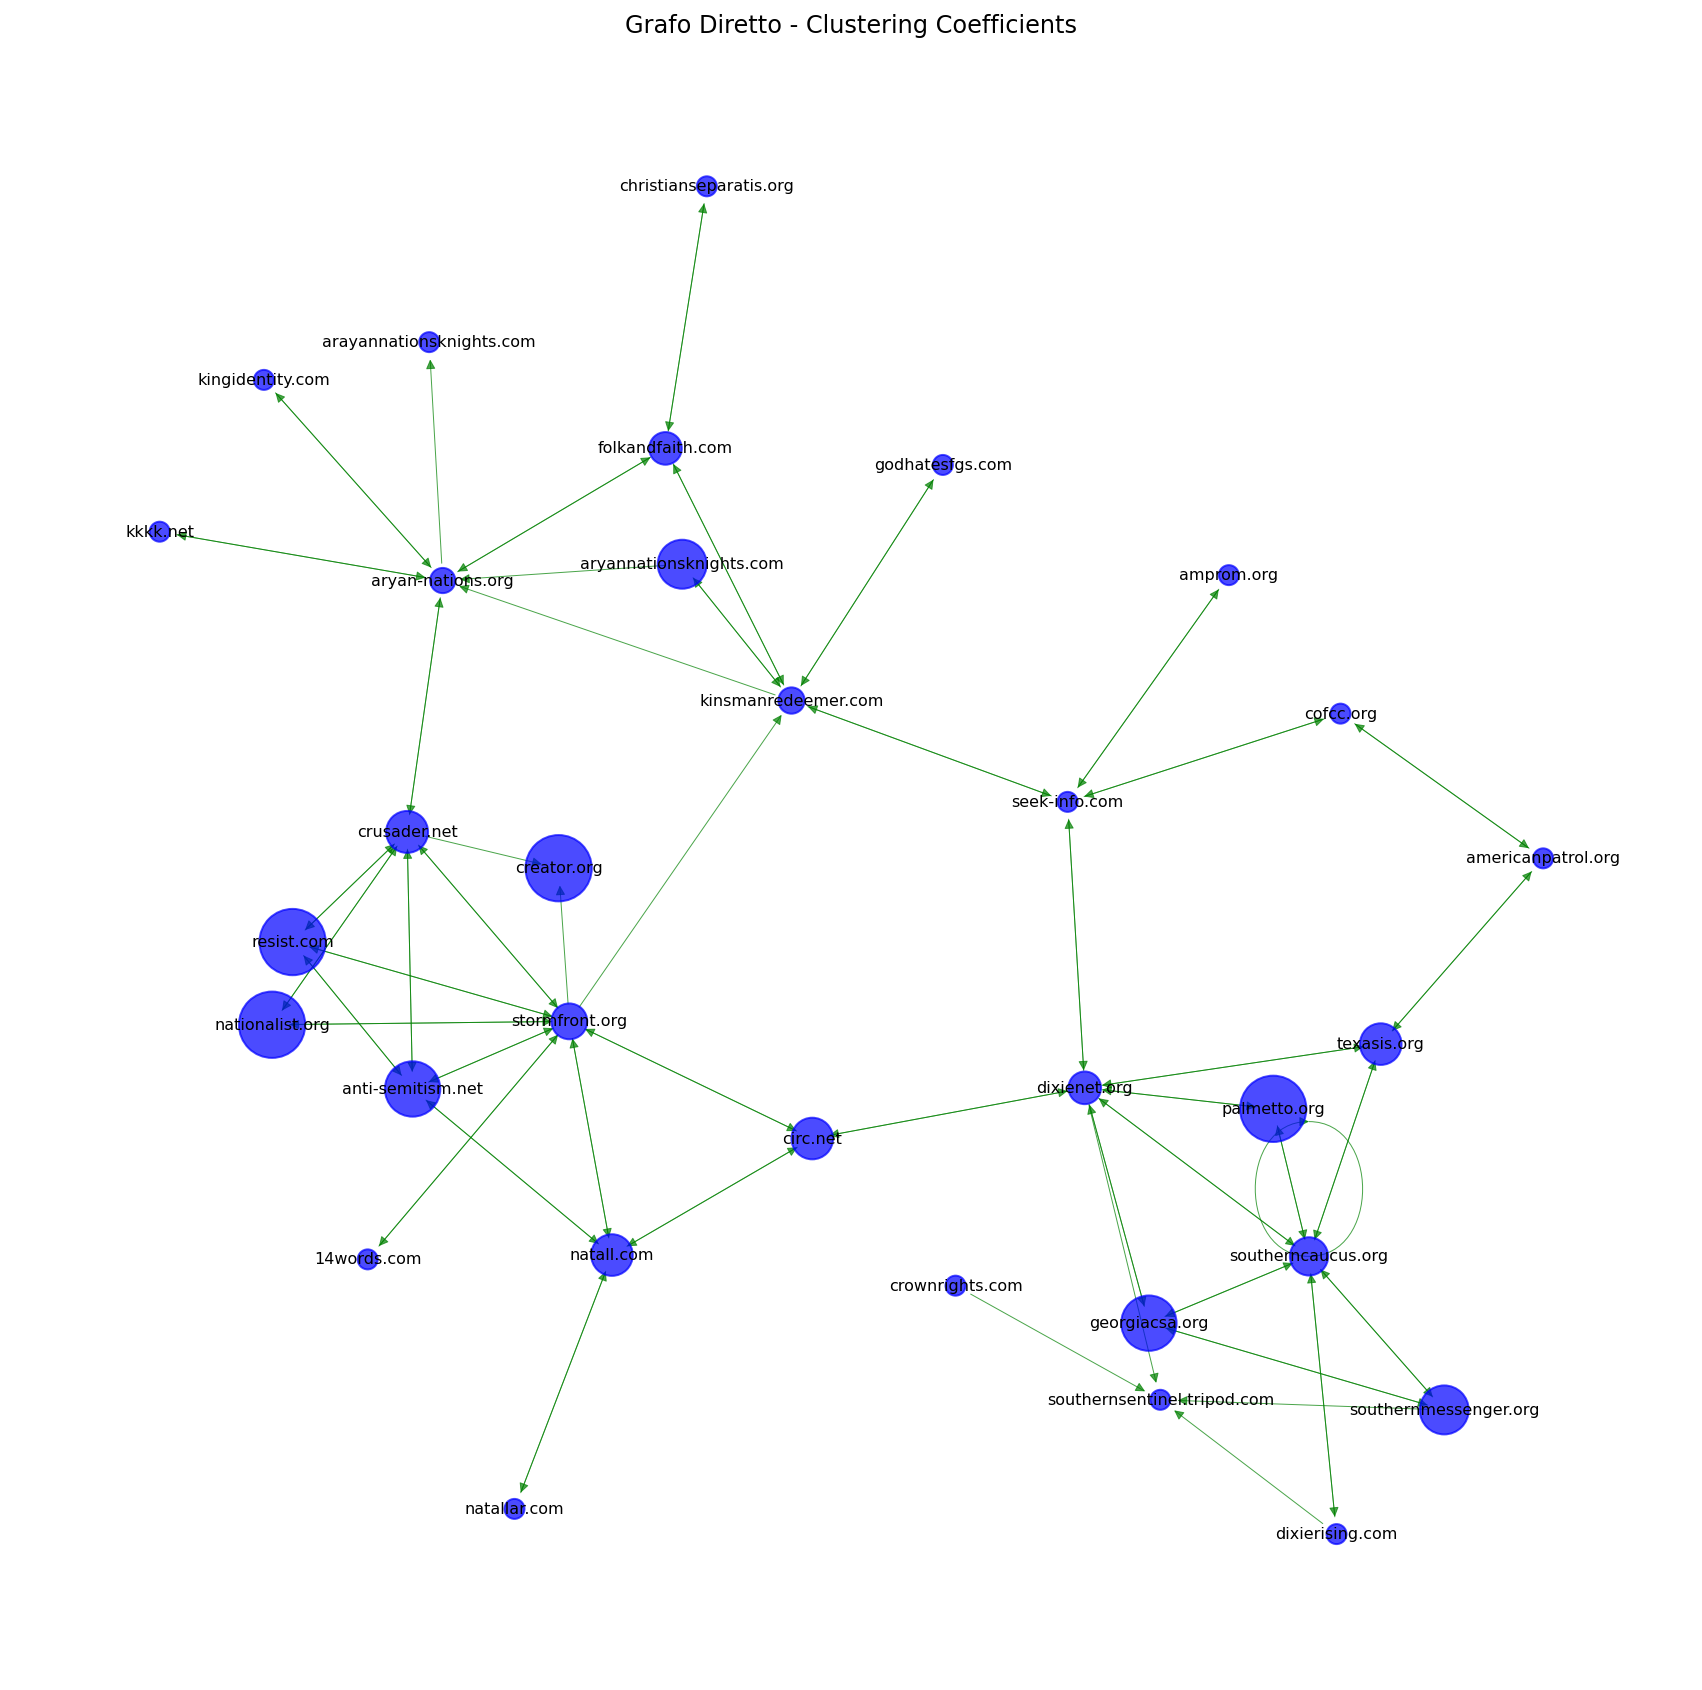

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertiamo il DataFrame in un grafo diretto utilizzando la matrice di adiacenza
G_directed = nx.from_pandas_adjacency(df_terror.set_index('Unnamed: 0'), create_using=nx.DiGraph)

# Calcola i clustering coefficients
clustering = nx.clustering(G_directed)

# Calcola il layout della rete per il grafo diretto
pos = nx.kamada_kawai_layout(G_directed)

# Calcoliamo la dimensione di ogni nodo in base al coefficiente di clustering
node_size = [v * 1000 +100 for v in clustering.values()]

# Calcoliamo la larghezza di ogni arco in base alla presenza di un collegamento
edge_width = [0.5 if G_directed[u][v]['weight'] > 0 else 0 for u, v in G_directed.edges()]

# Disegnamo il grafo diretto
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G_directed, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G_directed, pos, width=edge_width, alpha=0.7, edge_color='green', arrows=True)
nx.draw_networkx_labels(G_directed, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Grafo Diretto - Clustering Coefficients')
plt.show()


#### Calcolo del Clustering Coefficient -> identifica i nodi che sono più connessi tra loro rispetto agli altri nodi (comunità)

In [20]:
n = 10    # numero di nodi da stampare
clustering_coef = nx.clustering(G_directed)
# Ordina i nodi per coefficient_clustering 
top_n_clustering_coef_nodes = sorted(clustering_coef.items(), key=lambda x: x[1], reverse=True)[:n]

i = 1

print(f"Classifica {n} siti con il maggior valore di Clustering Coefficient:")
for node, centrality in top_n_clustering_coef_nodes:
    
    print(f"{i}. Sito: {node}, Clustering coefficient: {centrality}")
    i+=1

Classifica 10 siti con il maggior valore di Clustering Coefficient:
1. Sito: creator.org, Clustering coefficient: 1.0
2. Sito: nationalist.org, Clustering coefficient: 1.0
3. Sito: palmetto.org, Clustering coefficient: 1.0
4. Sito: resist.com, Clustering coefficient: 1.0
5. Sito: anti-semitism.net, Clustering coefficient: 0.6666666666666666
6. Sito: georgiacsa.org, Clustering coefficient: 0.6666666666666666
7. Sito: aryannationsknights.com, Clustering coefficient: 0.5
8. Sito: southernmessenger.org, Clustering coefficient: 0.5
9. Sito: crusader.net, Clustering coefficient: 0.34
10. Sito: circ.net, Clustering coefficient: 0.3333333333333333


#### Calcolo della Reciprocità -->   misura  quanto le relazioni in un grafo siano reciproche. la probabilità che un nodo sia collegato a un altro nodo che è a sua volta collegato a esso.

In [45]:
reciprocities = nx.reciprocity(G_directed)
# Ordina i nodi per coefficient_clustering 
#top_n_reciprocities_nodes = sorted(reciprocities.data(), key=lambda x: x[1], reverse=True)[:n]
print(reciprocities)

0.8764044943820225
